In [42]:
import numpy as np
import pandas as pd
import plotnine as p9
import os 
import sys
import random
file_dir = os.path.abspath('')

polygraph_diff_path = os.path.join(file_dir, '..', '..','re_design', 'polygraph', 'src')

if polygraph_diff_path not in sys.path:
    sys.path.append(polygraph_diff_path)

import polygraph.input, polygraph.embedding, polygraph.motifs, polygraph.models, polygraph.sequence, polygraph.utils, polygraph.visualize, polygraph.stats, polygraph.likelihood

pd.set_option('display.precision', 2)
%matplotlib inline

# Preparing the data

In [44]:
data_path = os.path.join(file_dir,'..','dirichlet_diffusion', 'generated_data')

motif_cluster_data = pd.read_csv(f"{data_path}/tcre_seq_motif_cluster.csv")
leiden_cluster_data = pd.read_csv(f"{data_path}/tcre_seq_leiden_class.csv")
leiden_cluster_data

peak chrom  \
0            chr1_29236_29737_-  chr1   
1          chr1_199774_200275_-  chr1   
2          chr1_199774_200275_-  chr1   
3          chr1_629102_629950_+  chr1   
4          chr1_630597_631171_+  chr1   
...                         ...   ...   
14804  chrY_20575222_20575876_+  chrY   
14805  chrY_21028687_21029188_-  chrY   
14806  chrY_21138232_21138733_+  chrY   
14807  chrY_21254335_21254836_+  chrY   
14808  chrY_57067464_57067965_+  chrY   

                                                sequence cell_type  
0      CTCCCTCCAGCCCCTCCGGGTCCCCTACTTCGCCCCGCCAGGCCCC...       ct3  
1      CCCTACTTCGCCCCGCCAGGCCCCCACGACCCTACTTCCCGCGGCC...       ct2  
2      CCCTACTTCGCCCCGCCAGGCCCCCACGACCCTACTTCCCGCGGCC...       ct3  
3      AGGCTTCAACATCGAATACGCCGCAGGCCCCTTCGCCCTATTCTTC...       ct3  
4      CAAAACCCACCCCATTCCTCCCCACACTCATCGCCCTTACCACACT...       ct2  
...                                                  ...       ...  
14804  GTCAGGGGTTTGAGAGCCTGGCCAACATGGTGAAACCCCATCTCTA...       ct3  
14805  TGTGGTGAGTGTTATAGCTCATAATGTTGGCACGGACCCAAACAGT...       ct3  
14806  ACATGACTTGCATATTTAGCATGTTAACTGCTTCATTTGGGGAGCT...       ct1  
14807  AAATAATAAAGTGTATTATTTATCTGTTTTACATACTGTTGGTTTT...       ct1  
14808  CGAAAGTAGAGGCAGTTCCTGTCAGATGAATTCTATTTTGTCTGTG...       ct2  

[14809 rows x 4 columns]

In [68]:
motif_cluster_data

peak chrom  \
0            chr1_29236_29737_-  chr1   
1          chr1_199774_200275_-  chr1   
2          chr1_629102_629950_+  chr1   
3          chr1_630597_631171_+  chr1   
4          chr1_632356_633841_+  chr1   
...                         ...   ...   
16140  chrY_21028687_21029188_-  chrY   
16141  chrY_21138232_21138733_+  chrY   
16142  chrY_21254335_21254836_+  chrY   
16143  chrY_57067464_57067965_+  chrY   
16144  chrY_57183815_57184316_+  chrY   

                                                sequence cell_type  
0      CTCCCTCCAGCCCCTCCGGGTCCCCTACTTCGCCCCGCCAGGCCCC...       ct2  
1      CCCTACTTCGCCCCGCCAGGCCCCCACGACCCTACTTCCCGCGGCC...       ct2  
2      AGGCTTCAACATCGAATACGCCGCAGGCCCCTTCGCCCTATTCTTC...       ct2  
3      CAAAACCCACCCCATTCCTCCCCACACTCATCGCCCTTACCACACT...       ct2  
4      AACACTTTCTCGGCCTATCCGGAATGCCCCGACGTTACTCGGACTA...       ct2  
...                                                  ...       ...  
16140  TGTGGTGAGTGTTATAGCTCATAATGTTGGCACGGACCCAAACAGT...       ct2  
16141  ACATGACTTGCATATTTAGCATGTTAACTGCTTCATTTGGGGAGCT...       ct2  
16142  AAATAATAAAGTGTATTATTTATCTGTTTTACATACTGTTGGTTTT...       ct1  
16143  CGAAAGTAGAGGCAGTTCCTGTCAGATGAATTCTATTTTGTCTGTG...       ct2  
16144  GGTGGAAGGAGAACCTGCACCTCTGGTTTTGGCAAAGTGTAGAAGG...       ct2  

[16145 rows x 4 columns]

In [70]:
print("Number of different loci:",len(set(motif_cluster_data['peak']) - set(leiden_cluster_data['peak'])))

Number of different loci: 3854


In [45]:
leiden_test_data = leiden_cluster_data[leiden_cluster_data['chrom']=='chr1'].reset_index(drop=True)
motif_test_data = motif_cluster_data[motif_cluster_data['chrom']=='chr1'].reset_index(drop=True)

shuffle_data = motif_cluster_data[motif_cluster_data['chrom']=='chr2'].reset_index(drop=True)
shuffle_data["sequence"] = shuffle_data["sequence"].apply(
        lambda x: "".join(random.sample(list(x), len(x)))
    )
leiden_train_data = leiden_cluster_data[(leiden_cluster_data["chrom"]!= "chr1") & (leiden_cluster_data["chrom"] != "chr2")].reset_index(drop=True)
motif_train_data = motif_cluster_data[(motif_cluster_data["chrom"]!= "chr1") & (motif_cluster_data["chrom"] != "chr2")].reset_index(drop=True)

In [46]:
motif_test_data['cell_type'].value_counts()

cell_type
ct2    1044
ct3     359
ct1     209
Name: count, dtype: int64

In [47]:
leiden_test_data['cell_type'].value_counts()

cell_type
ct3    579
ct2    569
ct1    336
Name: count, dtype: int64

In [48]:
MIN_NUMBER = 209

In [49]:
result_file = open("human_seqs.txt","w")
def write_file(name, df):
    for cluster, df_cluster in df.groupby("cell_type"):
        write_component = "\n".join(
            df_cluster[["peak", "cell_type", "sequence"]]
            .sample(n=MIN_NUMBER)
            .apply(lambda x: f"{x.sequence},{name}_{x.cell_type}\n", axis=1)
            .values.tolist()
        )
        result_file.write(write_component)

In [50]:
write_file("leiden_train", leiden_train_data)
write_file("leiden_test", leiden_test_data)
write_file("motif_train", motif_train_data)
write_file("motif_test", motif_test_data)
# Write shuffle
write_component = "\n".join(
            shuffle_data[["peak", "cell_type", "sequence"]]
            .sample(n=MIN_NUMBER)
            .apply(lambda x: f"{x.sequence},shuffle\n", axis=1)
            .values.tolist()
        )
result_file.write(write_component)
result_file.close()

# Comparing synthetic and native human enhancers designed for K562 cells using Polygraph

See the yeast tutorial for much more documentation and explanation!

### Read in data

In [51]:
seqs = polygraph.input.read_seqs('human_seqs.txt', sep=",")
seqs.head(3)

Sequence             Group
SeqID                                                                     
seq_0  GCCCGGCCTCGCGGCCTGGAACTGCCACCCCCAGCTGACCCCGTTT...  leiden_train_ct1
seq_1  AAGTCCAAGATCAAGGCACTGGTAGATTCAGTGTCTGCTGAGGACC...  leiden_train_ct1
seq_2  AAGAAAACCATGAAAAGTATTCTTTTTTAGTTTAGAAAAATTGATA...  leiden_train_ct1

In [52]:
print(seqs.Group.value_counts())

Group
leiden_train_ct1    209
leiden_train_ct2    209
leiden_train_ct3    209
leiden_test_ct1     209
leiden_test_ct2     209
leiden_test_ct3     209
motif_train_ct1     209
motif_train_ct2     209
motif_train_ct3     209
motif_test_ct1      209
motif_test_ct2      209
motif_test_ct3      209
shuffle             209
Name: count, dtype: int64


# 1. Evaluate sequence composition

## 1.1 GC Content

In [53]:
seqs['GC Content'] = polygraph.sequence.gc(seqs)
seqs.head()

Sequence             Group  \
SeqID                                                                        
seq_0  GCCCGGCCTCGCGGCCTGGAACTGCCACCCCCAGCTGACCCCGTTT...  leiden_train_ct1   
seq_1  AAGTCCAAGATCAAGGCACTGGTAGATTCAGTGTCTGCTGAGGACC...  leiden_train_ct1   
seq_2  AAGAAAACCATGAAAAGTATTCTTTTTTAGTTTAGAAAAATTGATA...  leiden_train_ct1   
seq_3  GTGTACAGCCTCAGTGATTCTTGAATCTCTGCATGGATGCCTCCTG...  leiden_train_ct1   
seq_4  CTGAAGACCTCAGGAGCCTGCTCCGTCCAAATATCTGTGCTGGGGA...  leiden_train_ct1   

       GC Content  
SeqID              
seq_0        0.74  
seq_1        0.42  
seq_2        0.49  
seq_3        0.49  
seq_4        0.47

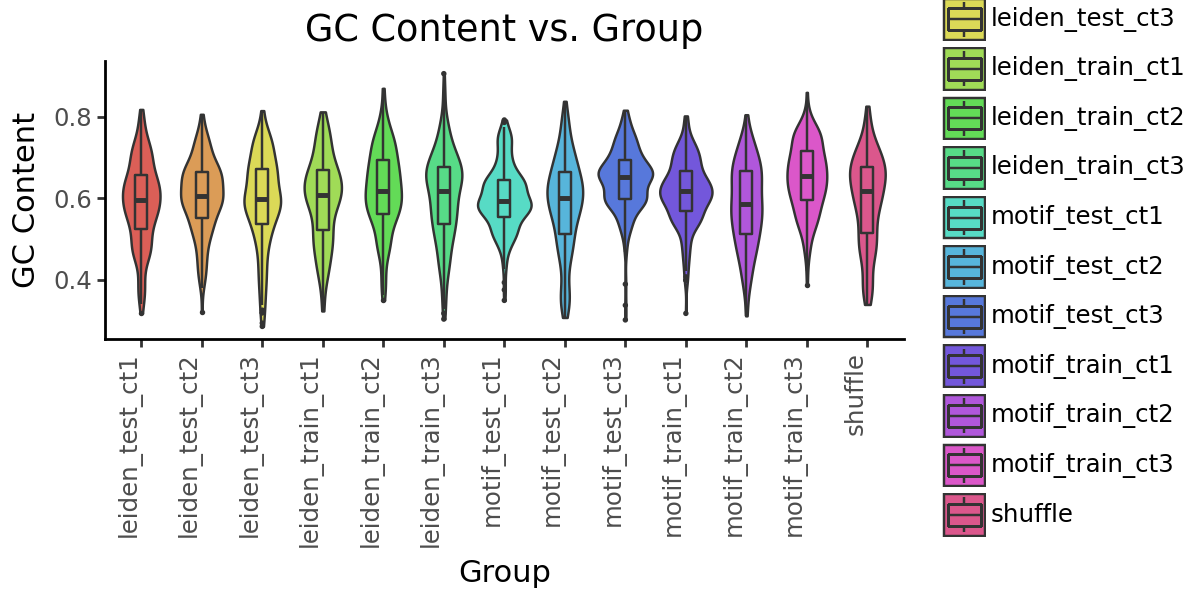

In [54]:
polygraph.visualize.boxplot(seqs, value_col='GC Content') + p9.theme(figure_size=(6, 3))

In [55]:
polygraph.stats.kruskal_dunn(data=seqs, val_col="GC Content")

{'Kruskal': 7.777310357980735e-17,
 'Dunn':                   leiden_test_ct1  leiden_test_ct2  leiden_test_ct3  \
 leiden_test_ct1          1.00e+00         2.89e-01         5.19e-01   
 leiden_test_ct2          2.89e-01         1.00e+00         7.13e-01   
 leiden_test_ct3          5.19e-01         7.13e-01         1.00e+00   
 leiden_train_ct1         4.76e-01         7.42e-01         9.30e-01   
 leiden_train_ct2         5.35e-03         1.72e-01         5.93e-02   
 leiden_train_ct3         1.61e-01         7.85e-01         5.19e-01   
 motif_test_ct1           7.13e-01         5.12e-01         7.65e-01   
 motif_test_ct2           9.44e-01         3.00e-01         5.40e-01   
 motif_test_ct3           6.28e-08         4.17e-05         4.36e-06   
 motif_train_ct1          5.83e-02         5.19e-01         2.89e-01   
 motif_train_ct2          7.13e-01         1.19e-01         2.89e-01   
 motif_train_ct3          3.44e-08         1.88e-05         2.05e-06   
 shuffle             

## 1.2 Sequence length distribution

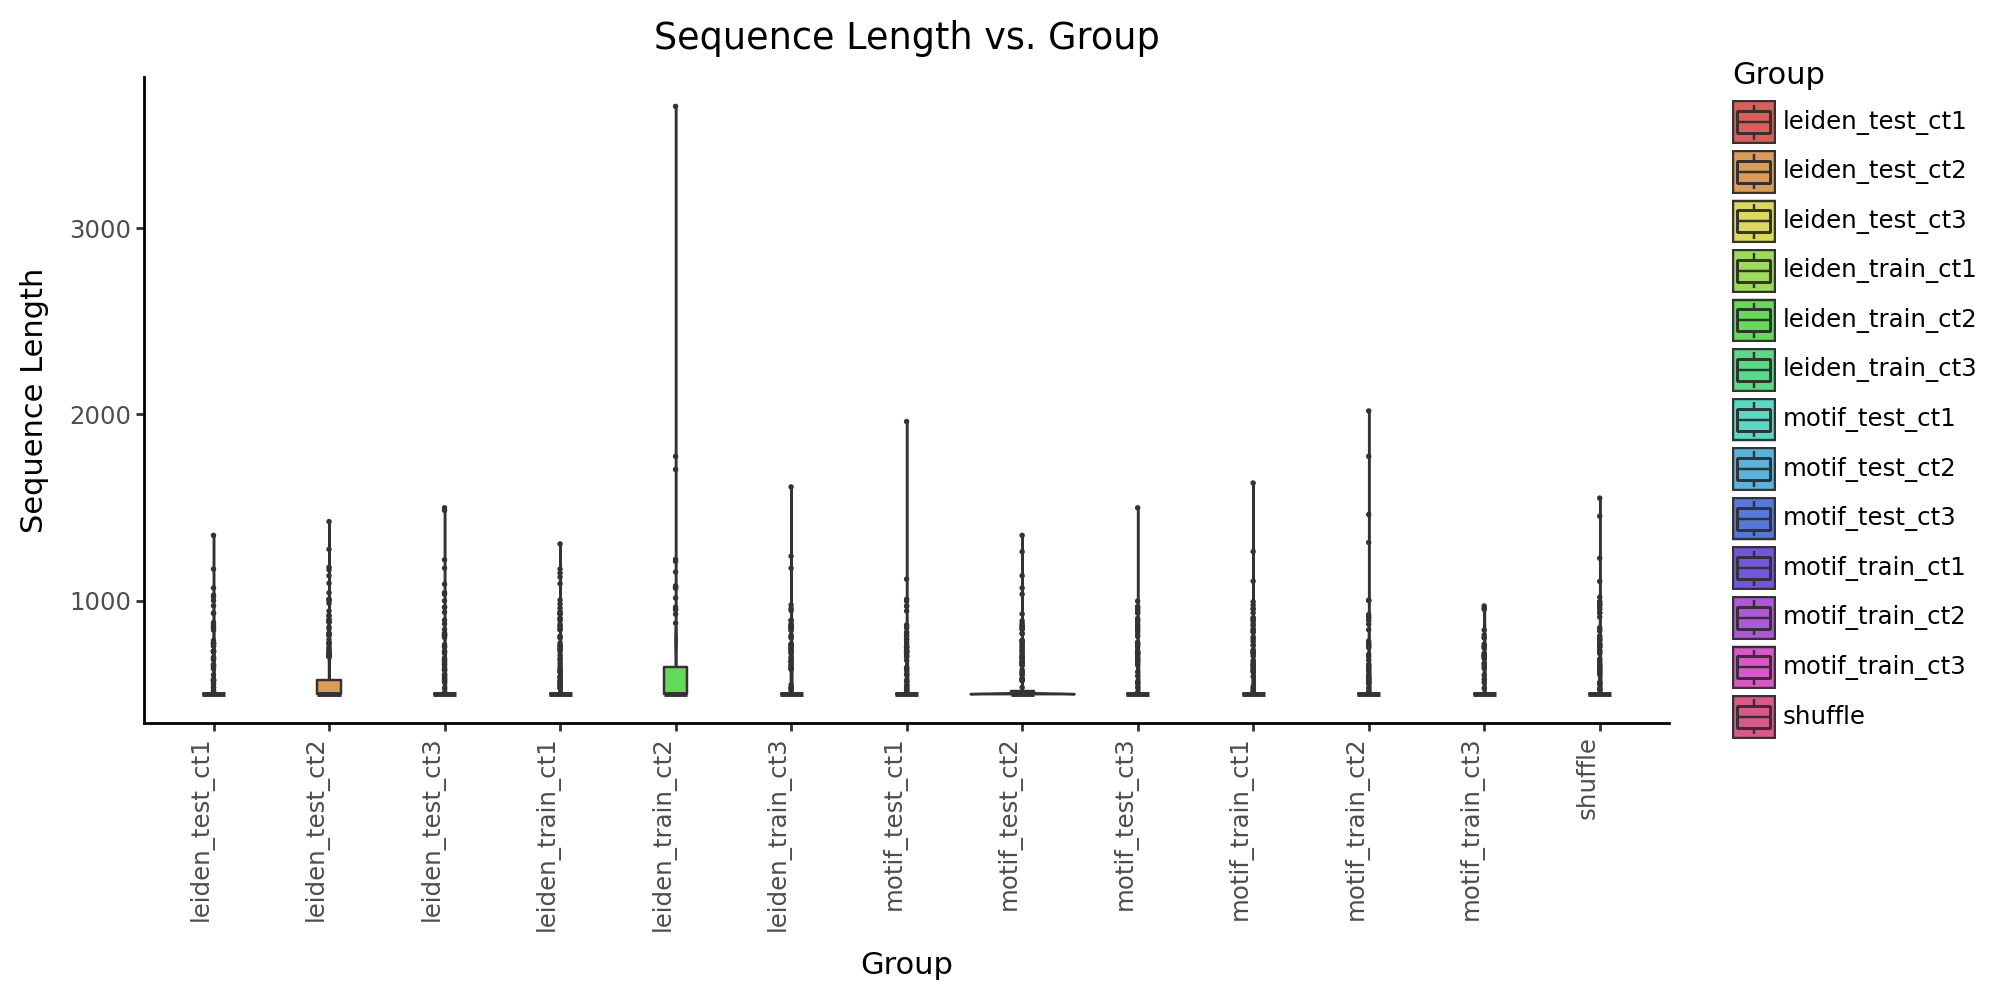

In [73]:
seqs['Sequence Length'] = seqs.Sequence.apply(len)
polygraph.visualize.boxplot(seqs, value_col='Sequence Length') + p9.theme(figure_size=(10, 5))

## 1.3 Edit distance to the nearest reference sequence

In [57]:
%%time
seqs['edit'] = polygraph.sequence.min_edit_distance_from_reference(seqs, reference_group='shuffle')
seqs.head()

CPU times: user 46.2 s, sys: 19.9 ms, total: 46.3 s
Wall time: 46.2 s


Sequence             Group  \
SeqID                                                                        
seq_0  GCCCGGCCTCGCGGCCTGGAACTGCCACCCCCAGCTGACCCCGTTT...  leiden_train_ct1   
seq_1  AAGTCCAAGATCAAGGCACTGGTAGATTCAGTGTCTGCTGAGGACC...  leiden_train_ct1   
seq_2  AAGAAAACCATGAAAAGTATTCTTTTTTAGTTTAGAAAAATTGATA...  leiden_train_ct1   
seq_3  GTGTACAGCCTCAGTGATTCTTGAATCTCTGCATGGATGCCTCCTG...  leiden_train_ct1   
seq_4  CTGAAGACCTCAGGAGCCTGCTCCGTCCAAATATCTGTGCTGGGGA...  leiden_train_ct1   

       GC Content  Sequence Length  edit  
SeqID                                     
seq_0        0.74              501   236  
seq_1        0.42              501   250  
seq_2        0.49              501   261  
seq_3        0.49              501   256  
seq_4        0.47              501   262

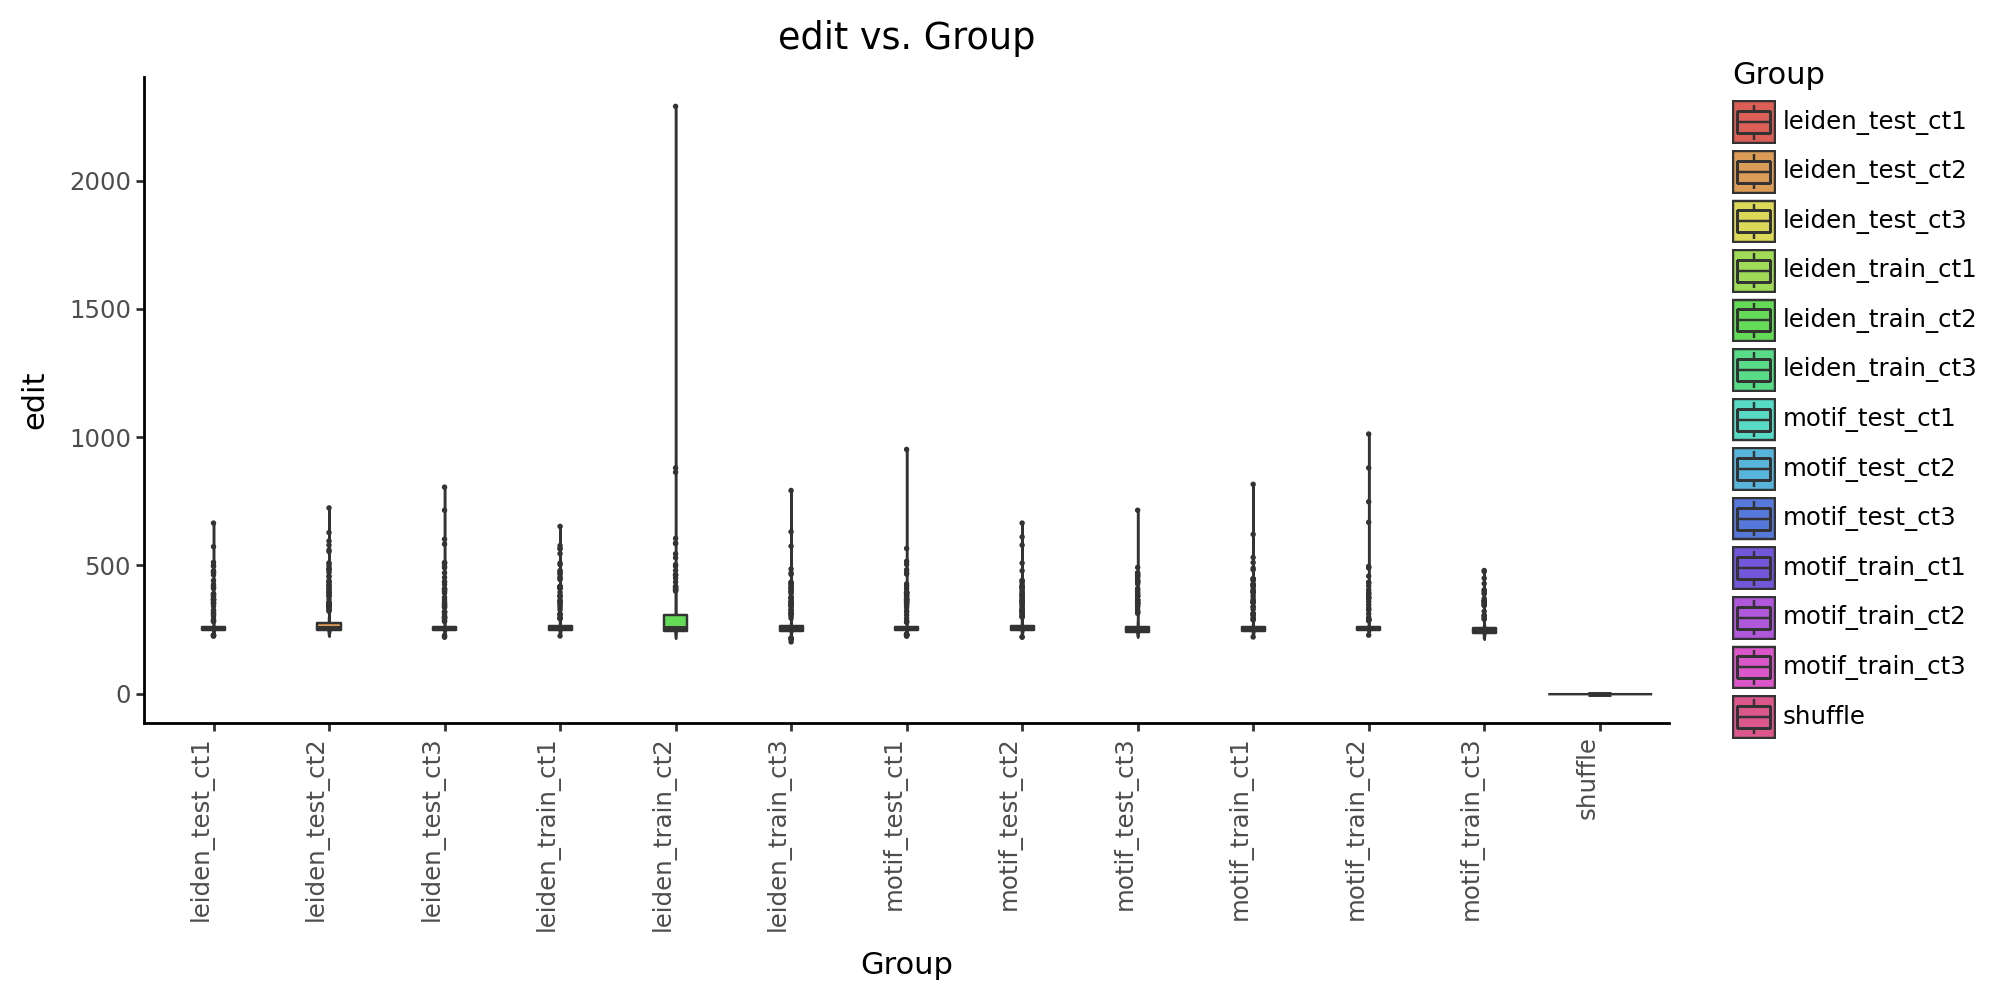

In [74]:
polygraph.visualize.boxplot(seqs, value_col='edit') + p9.theme(figure_size=(10, 5))

In [59]:
print(polygraph.stats.kruskal_dunn(data=seqs, val_col="edit"))

{'Kruskal': 4.702918841316524e-128, 'Dunn':                   leiden_test_ct1  leiden_test_ct2  leiden_test_ct3  \
leiden_test_ct1          1.00e+00         9.39e-01         9.39e-01   
leiden_test_ct2          9.39e-01         1.00e+00         8.94e-01   
leiden_test_ct3          9.39e-01         8.94e-01         1.00e+00   
leiden_train_ct1         9.39e-01         9.39e-01         9.39e-01   
leiden_train_ct2         9.39e-01         9.81e-01         8.94e-01   
leiden_train_ct3         9.39e-01         8.15e-01         9.39e-01   
motif_test_ct1           9.50e-01         9.39e-01         9.39e-01   
motif_test_ct2           9.39e-01         9.39e-01         8.15e-01   
motif_test_ct3           5.43e-03         2.41e-03         1.65e-02   
motif_train_ct1          8.15e-01         6.41e-01         9.39e-01   
motif_train_ct2          9.39e-01         9.39e-01         9.39e-01   
motif_train_ct3          7.12e-06         2.22e-06         3.75e-05   
shuffle                  8.42e-75

## 1.4 k-mer content

### 1.4.1 Count k-mer frequency

In [60]:
kmers = polygraph.sequence.kmer_frequencies(seqs, k=5, normalize=True)
print(kmers.shape)
kmers.iloc[:5, :5]

(2717, 1024)
CPU times: user 8.82 s, sys: 671 ms, total: 9.49 s
Wall time: 9.45 s


AAAAA     AAAAC     AAAAG     AAAAT     AAACA
SeqID                                                  
seq_0  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
seq_1  2.01e-03  6.04e-03  0.00e+00  0.00e+00  6.04e-03
seq_2  4.02e-03  2.01e-03  2.01e-03  8.05e-03  0.00e+00
seq_3  0.00e+00  0.00e+00  4.02e-03  0.00e+00  2.01e-03
seq_4  0.00e+00  0.00e+00  2.01e-03  0.00e+00  2.01e-03

### 1.4.2 Compute statistics

In [61]:
emb = polygraph.embedding.embedding_analysis(kmers, seqs, reference_group='shuffle', use_pca=True)

Creating AnnData object
PCA


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.


Fraction of total variance explained by PCA components:  0.4437122852830879
UMAP
Differential feature abundance


/root/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
/root/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
/root/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
/root/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a fu

1-NN statistics
Within-group KNN diversity
Euclidean distance to nearest reference


/usr/local/lib/python3.10/dist-packages/scikit_posthocs/_posthocs.py:357: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/usr/local/lib/python3.10/dist-packages/scikit_posthocs/_posthocs.py:360: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/usr/local/lib/python3.10/dist-packages/scikit_posthocs/_posthocs.py:357: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/usr/local/lib/python3.10/dist-packages/scikit_posthocs/_posthocs.py:3

Train groupwise classifiers
CPU times: user 16 s, sys: 29 s, total: 45 s
Wall time: 10.1 s


### 1.4.3 Visualize

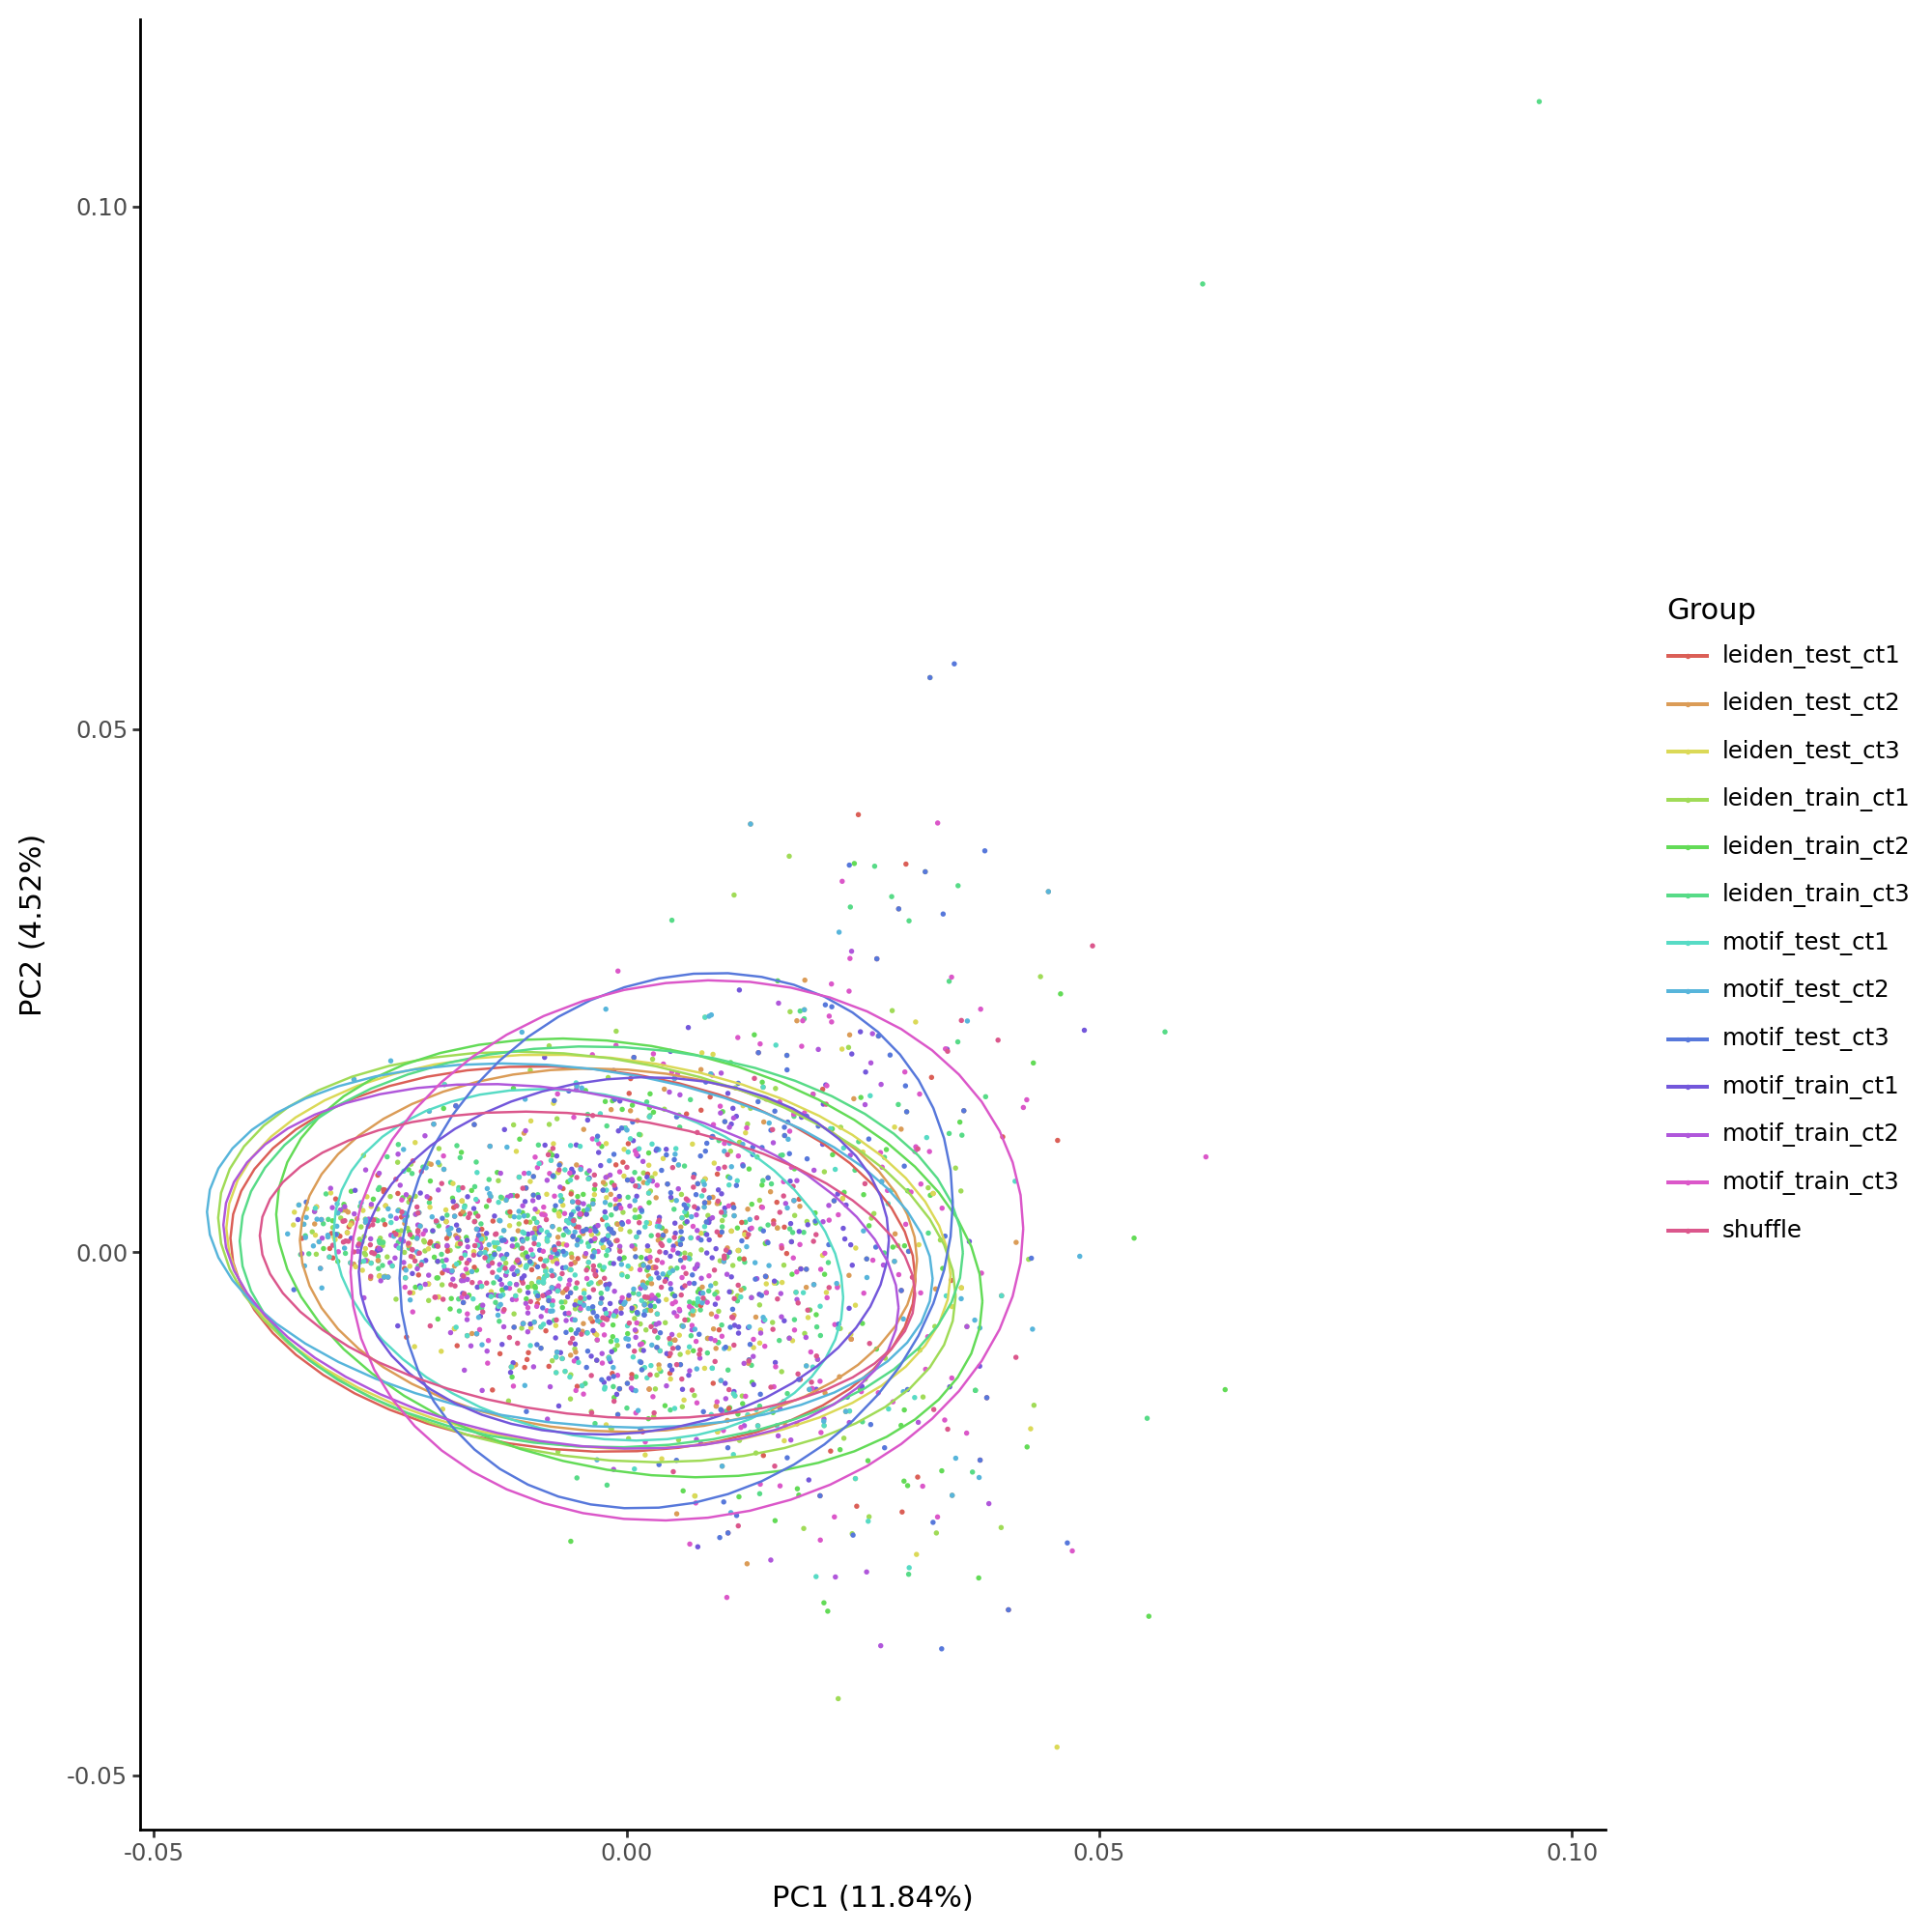

In [77]:
polygraph.visualize.pca_plot(emb, show_ellipse=True) + p9.theme(figure_size=(10, 10))

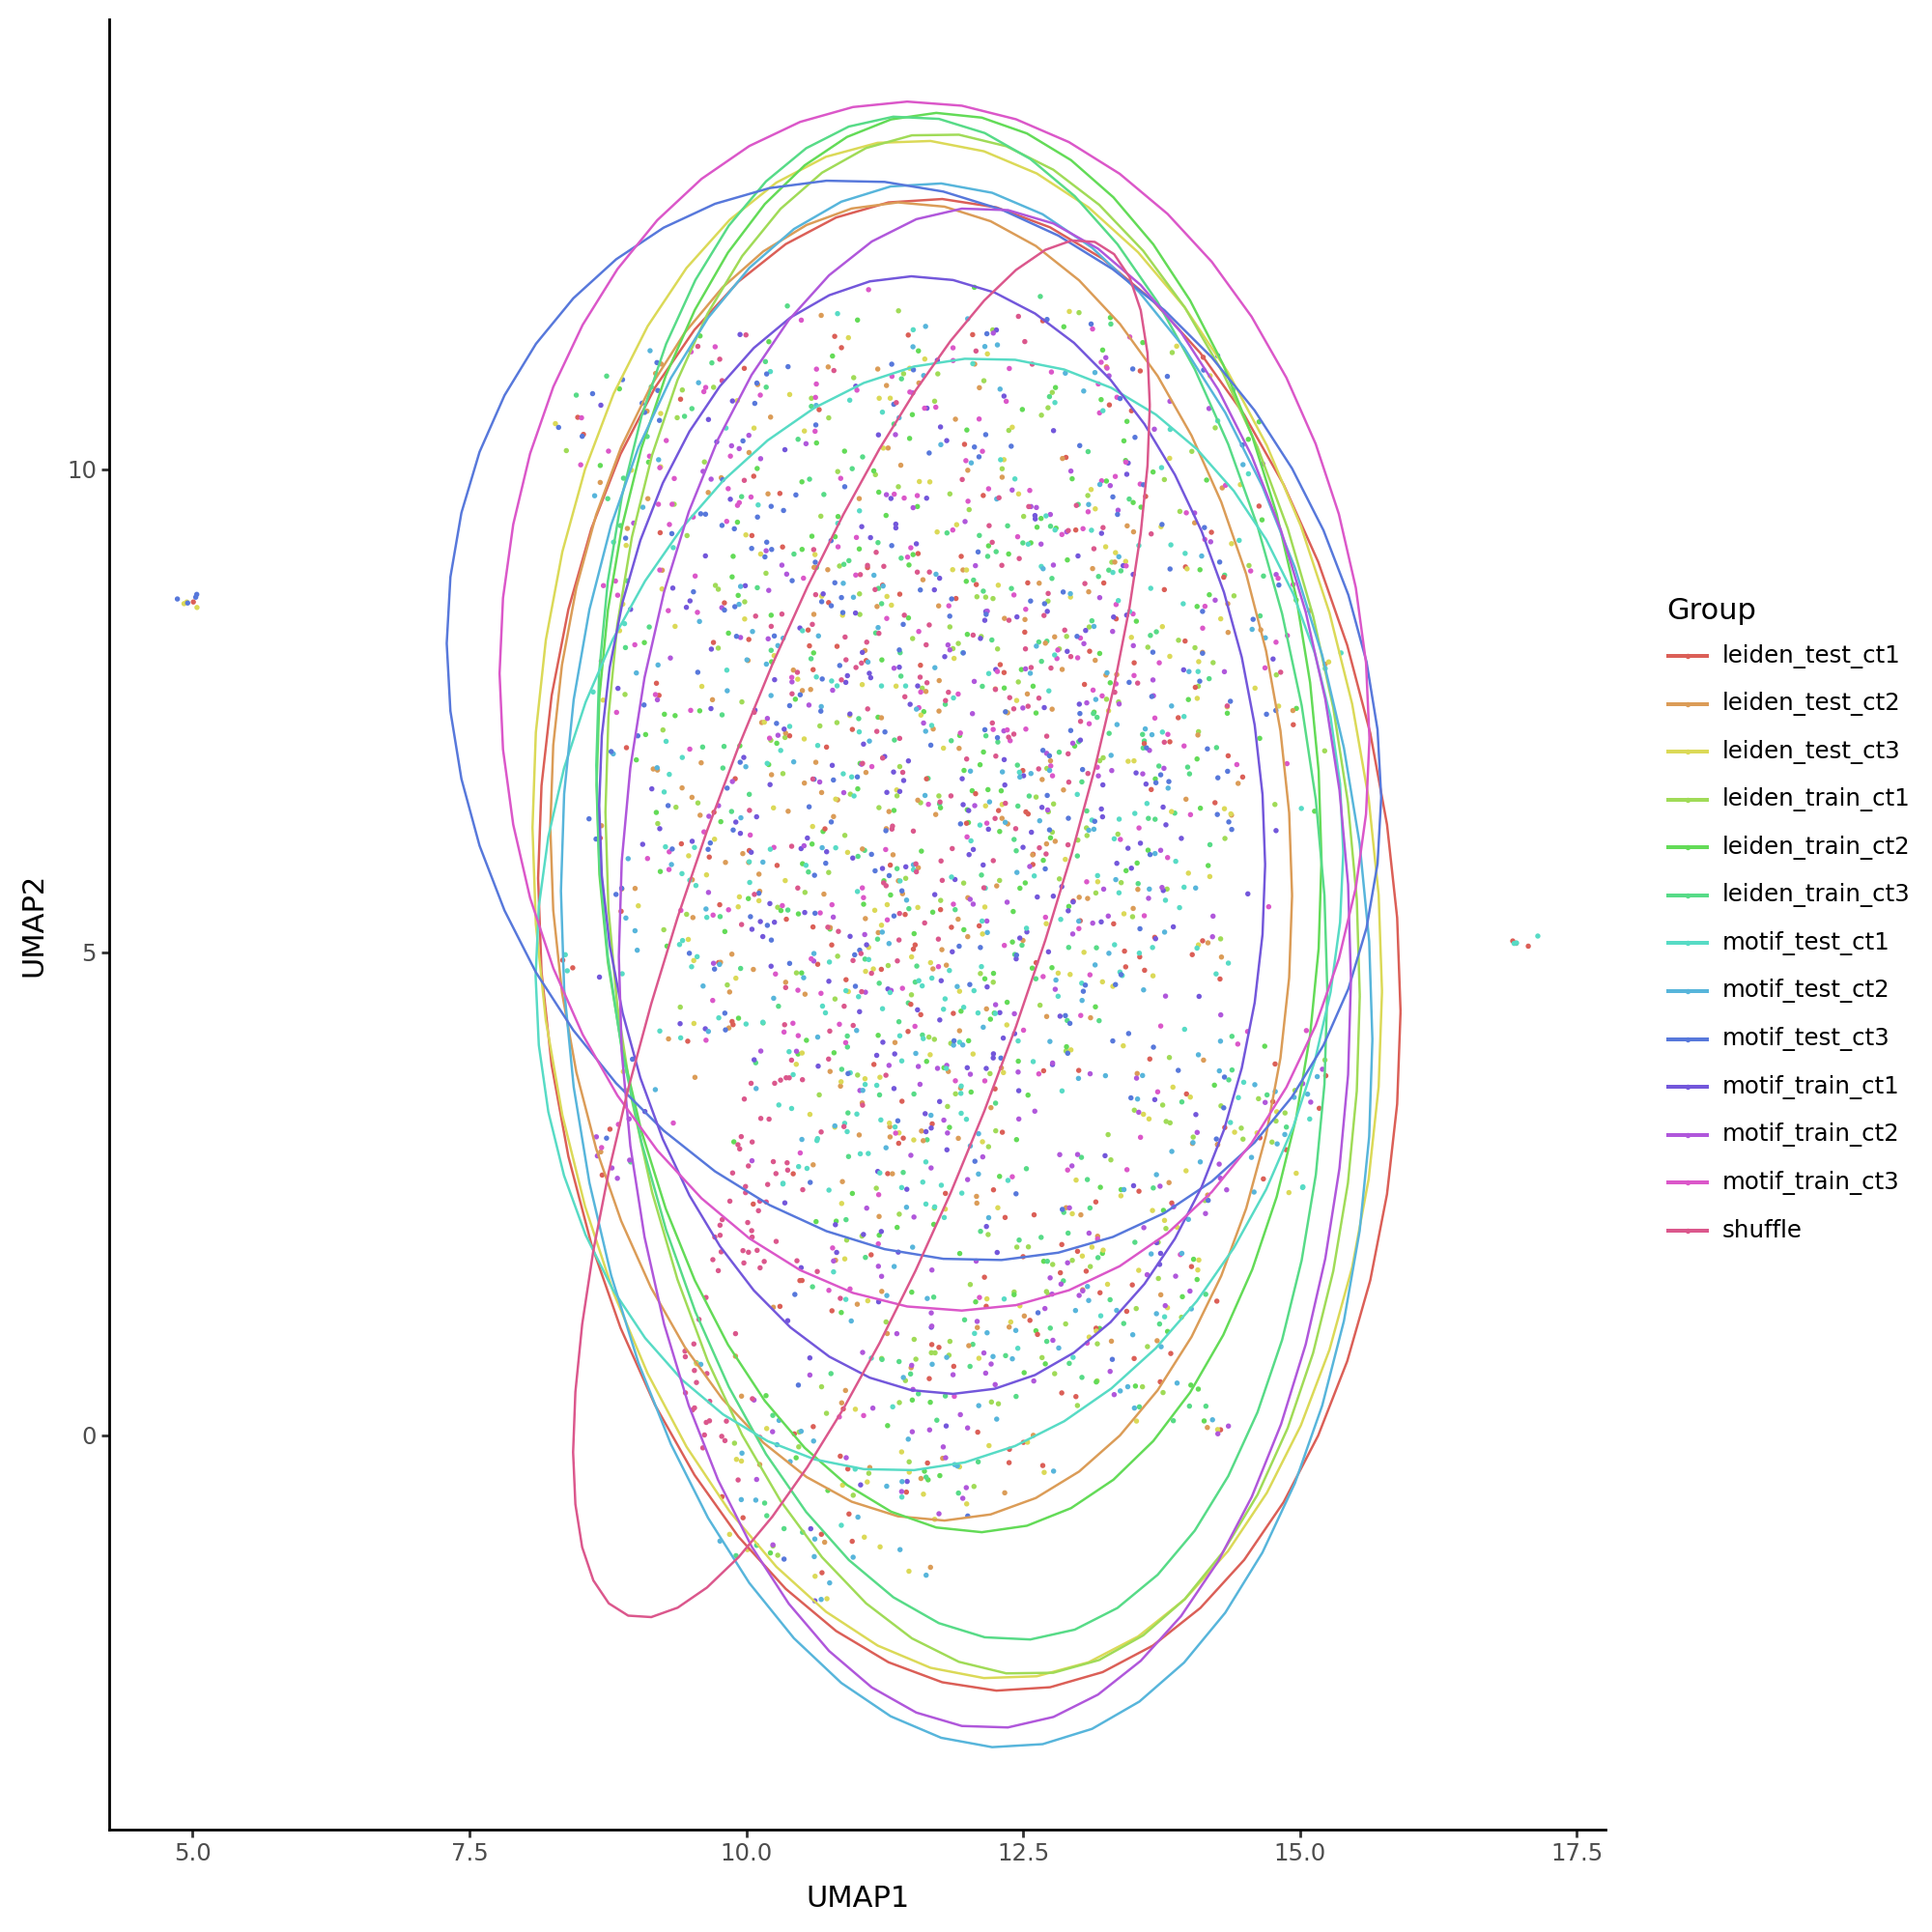

In [78]:
polygraph.visualize.umap_plot(emb, show_ellipse=True) + p9.theme(figure_size=(10, 10))

### 1.4.4 k-mer occurrence

/usr/local/lib/python3.10/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/usr/local/lib/python3.10/dist-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

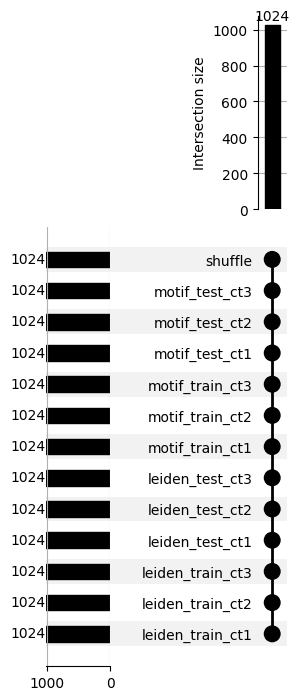

In [79]:
polygraph.visualize.upset_plot(emb)

### 1.4.5 Differential k-mer abundance

In [80]:
print("Number of differential k-mers compared to reference")
print(emb.uns["DE_test"][emb.uns["DE_test"].padj < .05].Group.value_counts())

print("")

print("Top Differential k-mers")
print(emb.uns["DE_test"][emb.uns["DE_test"].padj < .05].sort_values('padj').head())

Number of differential k-mers compared to reference
Group
motif_test_ct3      391
leiden_train_ct1    380
motif_test_ct2      373
leiden_test_ct1     371
motif_train_ct3     365
motif_train_ct2     358
leiden_test_ct2     357
leiden_test_ct3     354
leiden_train_ct3    342
leiden_train_ct2    332
motif_train_ct1     313
motif_test_ct1      287
Name: count, dtype: int64

Top Differential k-mers
                Group  value  score      padj  log2FC
9216  motif_train_ct1  CTTCC  10.95  7.19e-25    1.75
6144   motif_test_ct1  CTTCC  10.53  6.21e-23    1.78
9217  motif_train_ct1  GGAAG   9.27  9.63e-18    1.50
6145   motif_test_ct1  TTCCG   8.76  9.85e-16    1.64
9218  motif_train_ct1  TTCCG   8.49  6.79e-15    1.56


### 1.4.6 1-nearest neighbor fraction

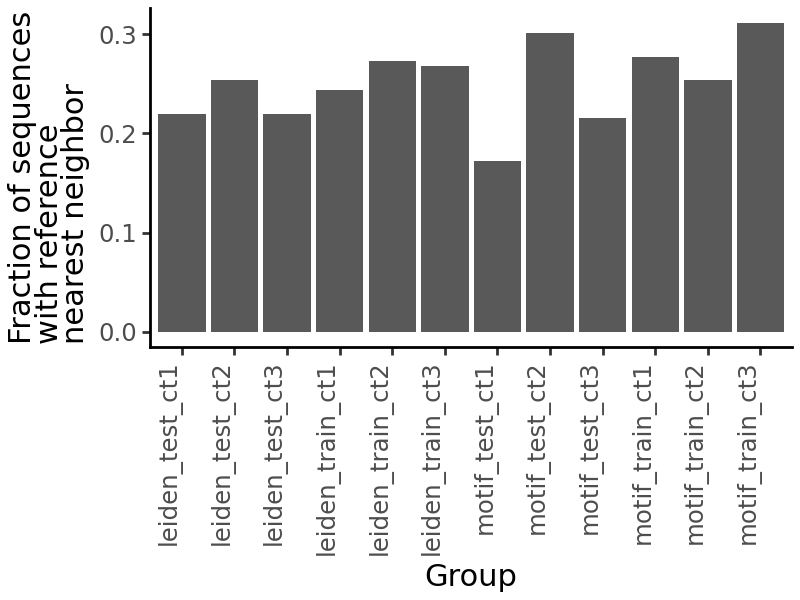

In [83]:
polygraph.visualize.one_nn_frac_plot(emb, reference_group="shuffle") + p9.theme(figure_size=(4,3))

In [86]:
print("p-values for proportion of sequences with reference nearest neighbor")
print(emb.uns["1NN_ref_prop_test"])

p-values for proportion of sequences with reference nearest neighbor
                  group_prop  ref_prop      pval      padj
Group                                                     
leiden_train_ct1        0.24      0.98  1.12e-61  3.36e-61
leiden_train_ct2        0.27      0.97  3.88e-55  5.18e-55
leiden_train_ct3        0.27      0.98  9.61e-60  1.92e-59
leiden_test_ct1         0.22      0.96  2.82e-61  6.78e-61
leiden_test_ct2         0.25      0.95  3.73e-53  4.47e-53
leiden_test_ct3         0.22      0.95  6.20e-59  1.06e-58
motif_train_ct1         0.28      0.98  4.64e-57  6.96e-57
motif_train_ct2         0.25      0.98  9.81e-62  3.36e-61
motif_train_ct3         0.31      0.97  3.08e-50  3.35e-50
motif_test_ct1          0.17      0.98  2.91e-74  3.50e-73
motif_test_ct2          0.30      0.94  4.94e-46  4.94e-46
motif_test_ct3          0.22      0.98  2.42e-67  1.45e-66


### 1.4.7 Distance to closest reference sequence

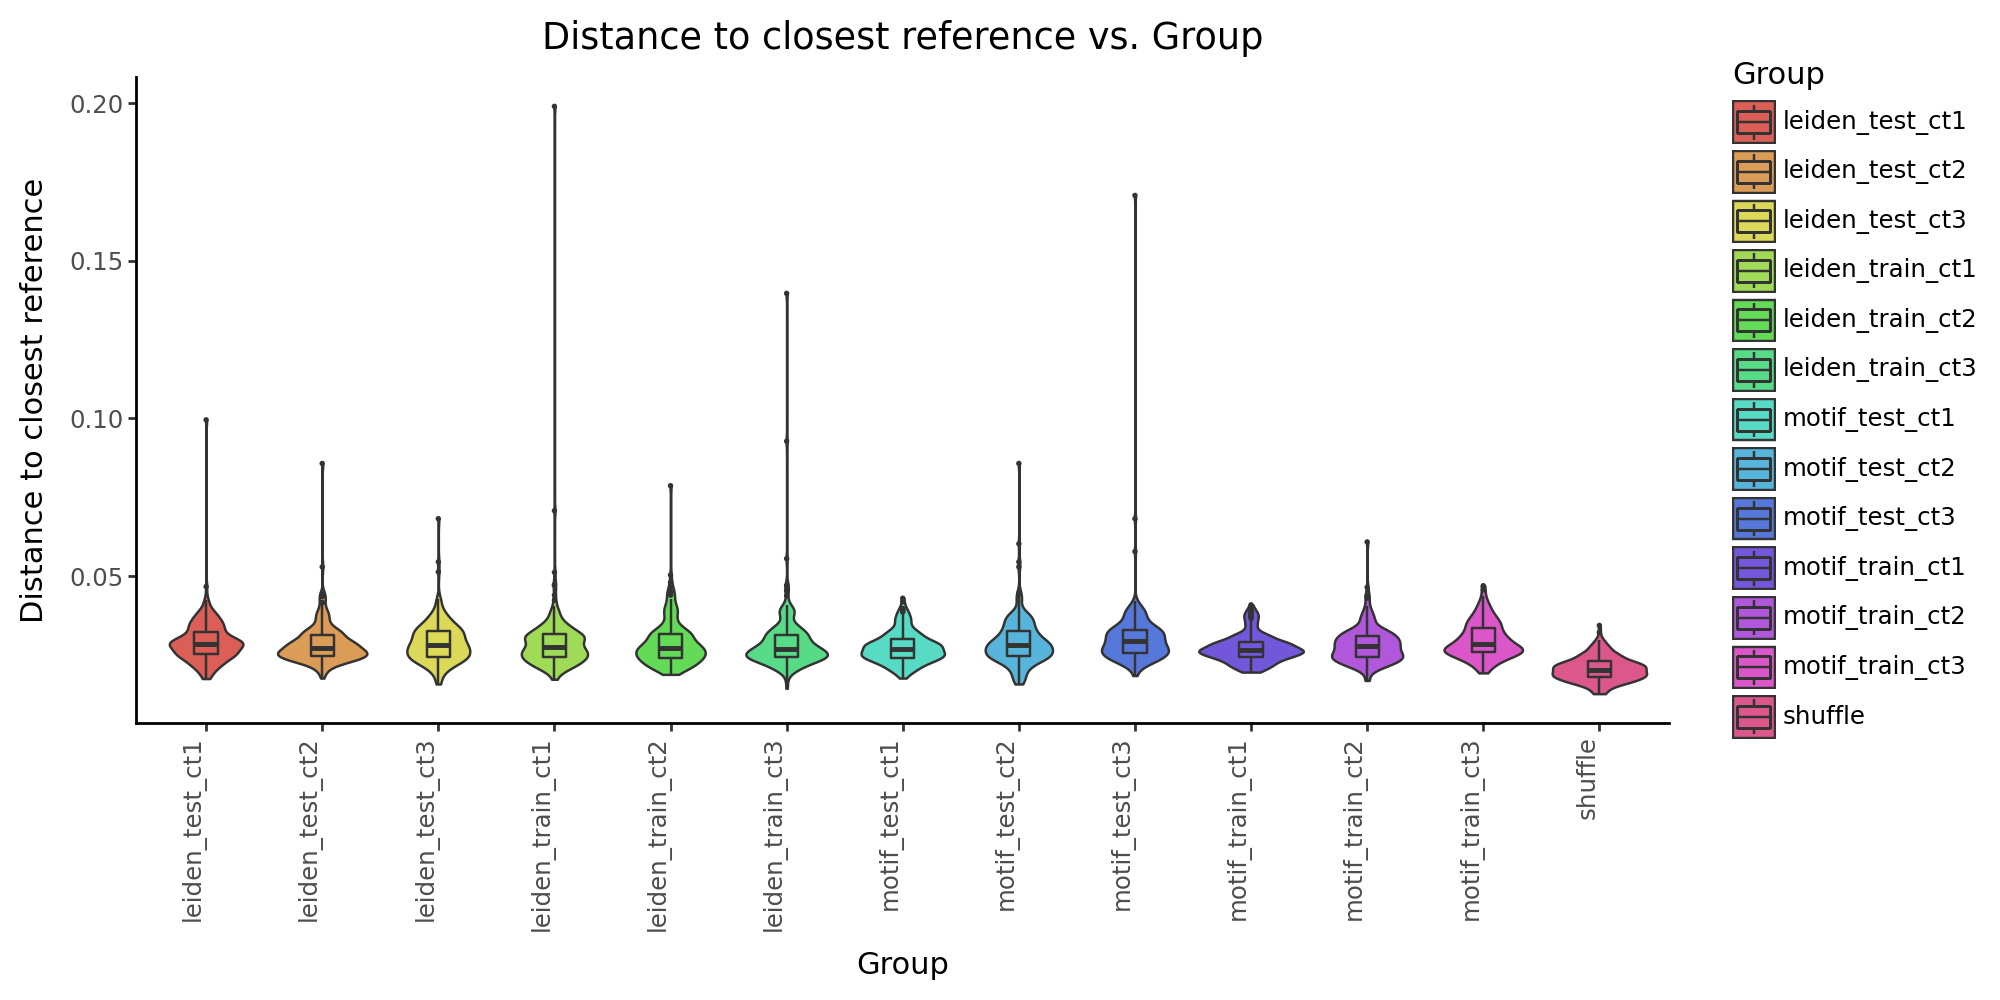

In [88]:
polygraph.visualize.boxplot(emb.obs, value_col='Distance to closest reference') + p9.theme(figure_size=(10, 5))

In [89]:
print("p-values for distance to closest reference")
print(emb.uns["ref_dist_test"])

p-values for distance to closest reference
{'Kruskal': 4.92719602801784e-78, 'Dunn':                   leiden_test_ct1  leiden_test_ct2  leiden_test_ct3  \
leiden_test_ct1          1.00e+00         2.34e-01         7.78e-01   
leiden_test_ct2          2.34e-01         1.00e+00         4.09e-01   
leiden_test_ct3          7.78e-01         4.09e-01         1.00e+00   
leiden_train_ct1         2.43e-01         9.81e-01         4.22e-01   
leiden_train_ct2         1.63e-01         8.50e-01         2.97e-01   
leiden_train_ct3         1.33e-01         8.02e-01         2.49e-01   
motif_test_ct1           1.01e-02         2.34e-01         3.08e-02   
motif_test_ct2           5.48e-01         5.87e-01         8.42e-01   
motif_test_ct3           2.96e-01         1.63e-02         1.62e-01   
motif_train_ct1          4.30e-03         1.51e-01         1.54e-02   
motif_train_ct2          1.66e-01         8.58e-01         3.02e-01   
motif_train_ct3          4.43e-01         3.84e-02         2.58

### 1.4.8 KNN distance (diversity metric)

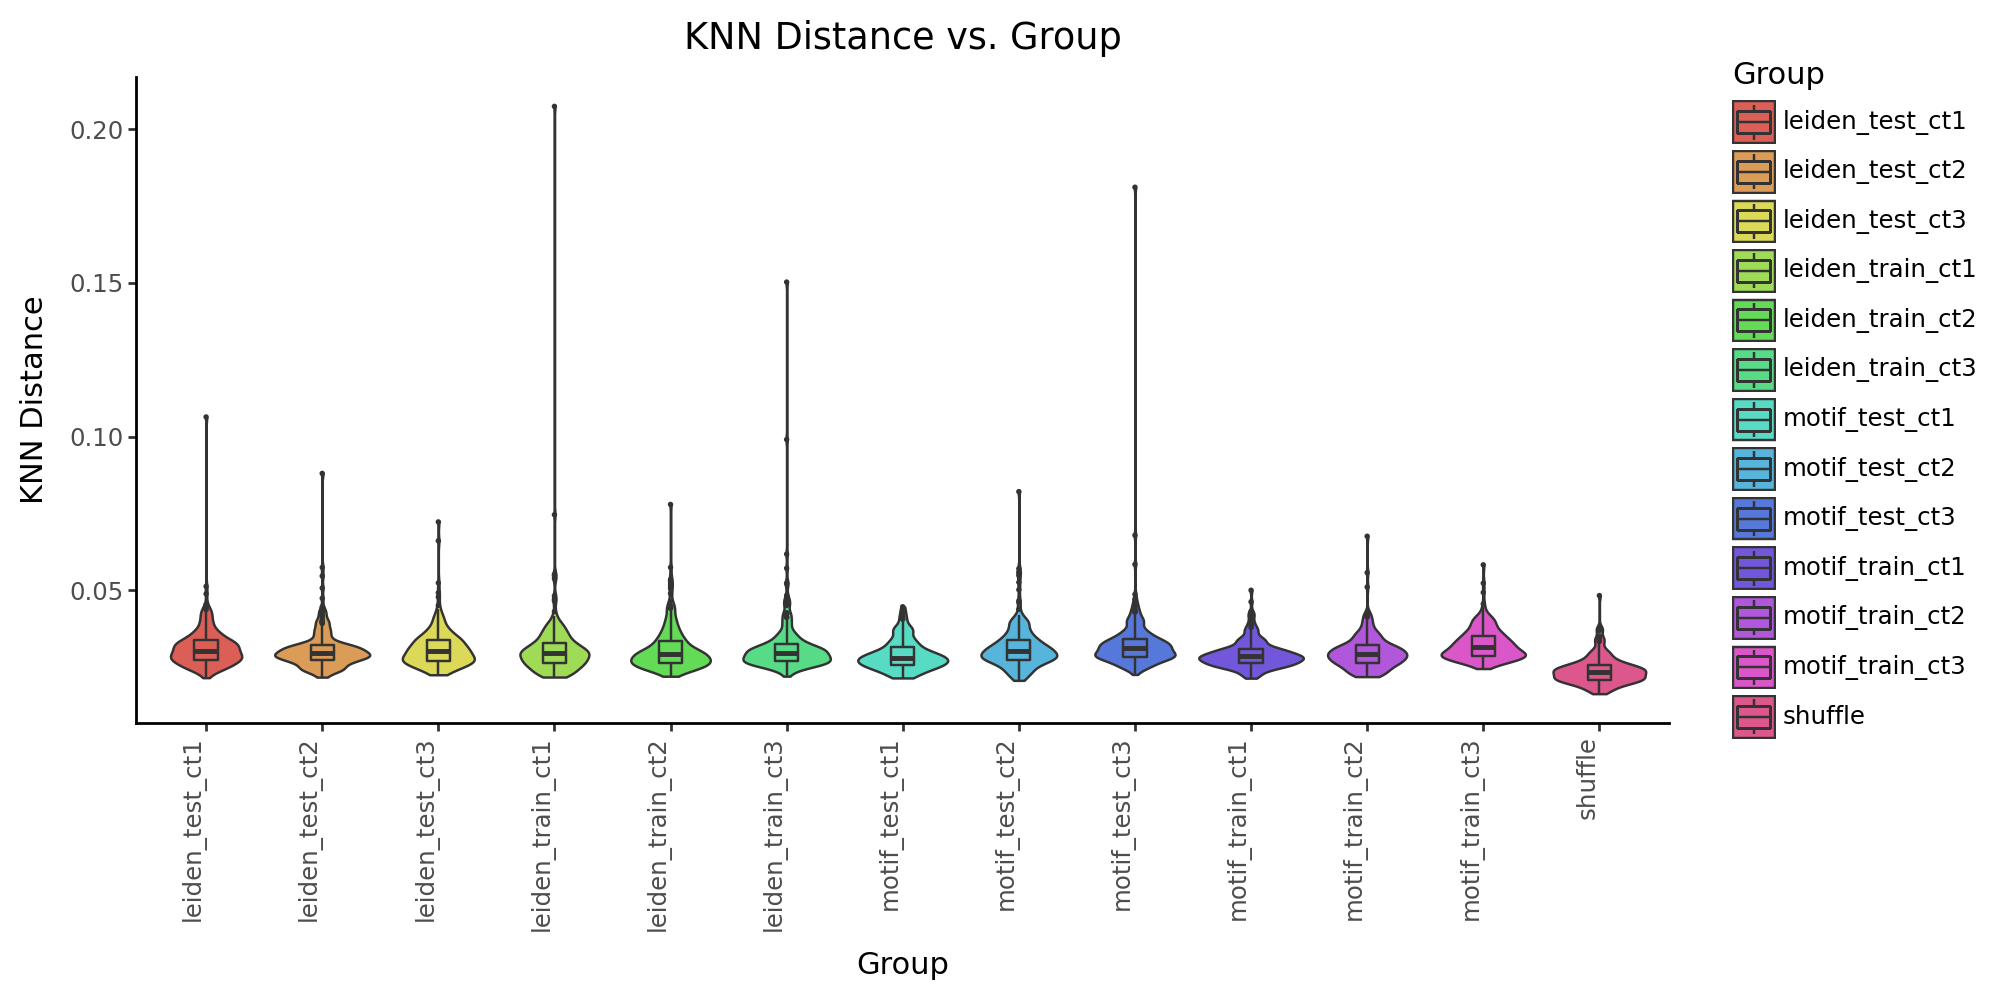

In [91]:
polygraph.visualize.boxplot(emb.obs, value_col='KNN Distance') + p9.theme(figure_size=(10, 5))

In [92]:
print("p-values for KNN diversity")
print(emb.uns["knn_dist_test"])

p-values for KNN diversity
{'Kruskal': 1.0125279193602244e-77, 'Dunn':                   leiden_test_ct1  leiden_test_ct2  leiden_test_ct3  \
leiden_test_ct1          1.00e+00         1.62e-01         5.95e-01   
leiden_test_ct2          1.62e-01         1.00e+00         4.23e-01   
leiden_test_ct3          5.95e-01         4.23e-01         1.00e+00   
leiden_train_ct1         7.04e-02         6.91e-01         2.20e-01   
leiden_train_ct2         6.06e-02         6.48e-01         2.00e-01   
leiden_train_ct3         2.94e-01         7.18e-01         6.29e-01   
motif_test_ct1           1.70e-05         5.90e-03         2.46e-04   
motif_test_ct2           6.48e-01         3.61e-01         9.13e-01   
motif_test_ct3           1.07e-01         1.77e-03         2.68e-02   
motif_train_ct1          2.09e-04         2.97e-02         1.96e-03   
motif_train_ct2          1.80e-02         3.90e-01         7.68e-02   
motif_train_ct3          1.80e-02         9.02e-05         2.63e-03   
shuffl

### 1.4.9 Classifier performance

In [93]:
# Performance of a classifier trained to separate each group from the reference
emb.uns['svm_performance']

Accuracy  AUROC
Group                            
leiden_train_ct1      0.98   0.98
leiden_train_ct2      0.90   0.90
leiden_train_ct3      0.94   0.94
leiden_test_ct1       0.99   0.99
leiden_test_ct2       0.97   0.97
leiden_test_ct3       0.97   0.97
motif_train_ct1       0.95   0.95
motif_train_ct2       0.96   0.96
motif_train_ct3       0.83   0.83
motif_test_ct1        0.97   0.97
motif_test_ct2        0.97   0.97
motif_test_ct3        0.88   0.88

## 1.5 Gapped k-mer embedding

### 1.5.1 Count gapped k-mers

In [96]:
gkm = polygraph.sequence.fastsk(seqs, k=12, m=1)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2717,) + inhomogeneous part.

### 1.5.2 Compute statistics

In [97]:
%%time
emb = polygraph.embedding.embedding_analysis(
    gkm, seqs, reference_group="leiden_train_ct1", use_pca=True)

NameError: name 'gkm' is not defined

### 1.5.3 Visualize

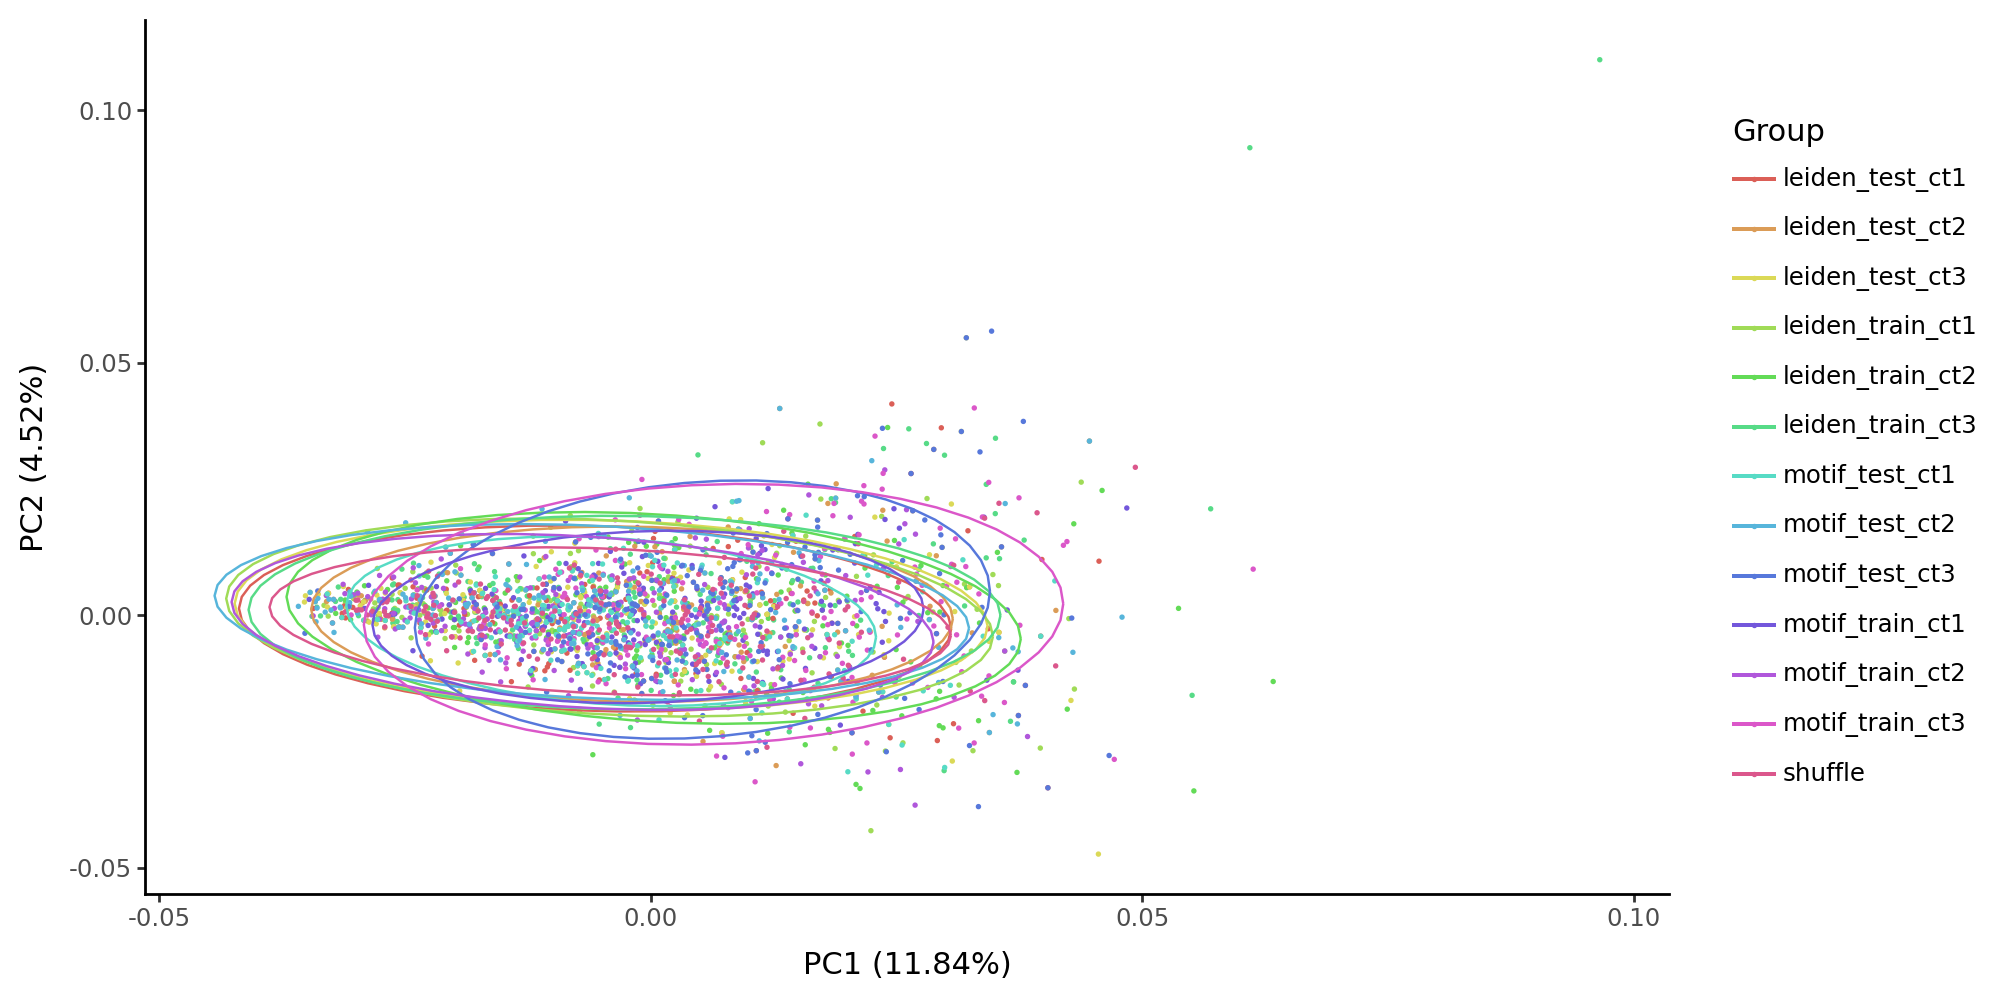

In [100]:
polygraph.visualize.pca_plot(emb, show_ellipse=True) + p9.theme(figure_size=(10,5))

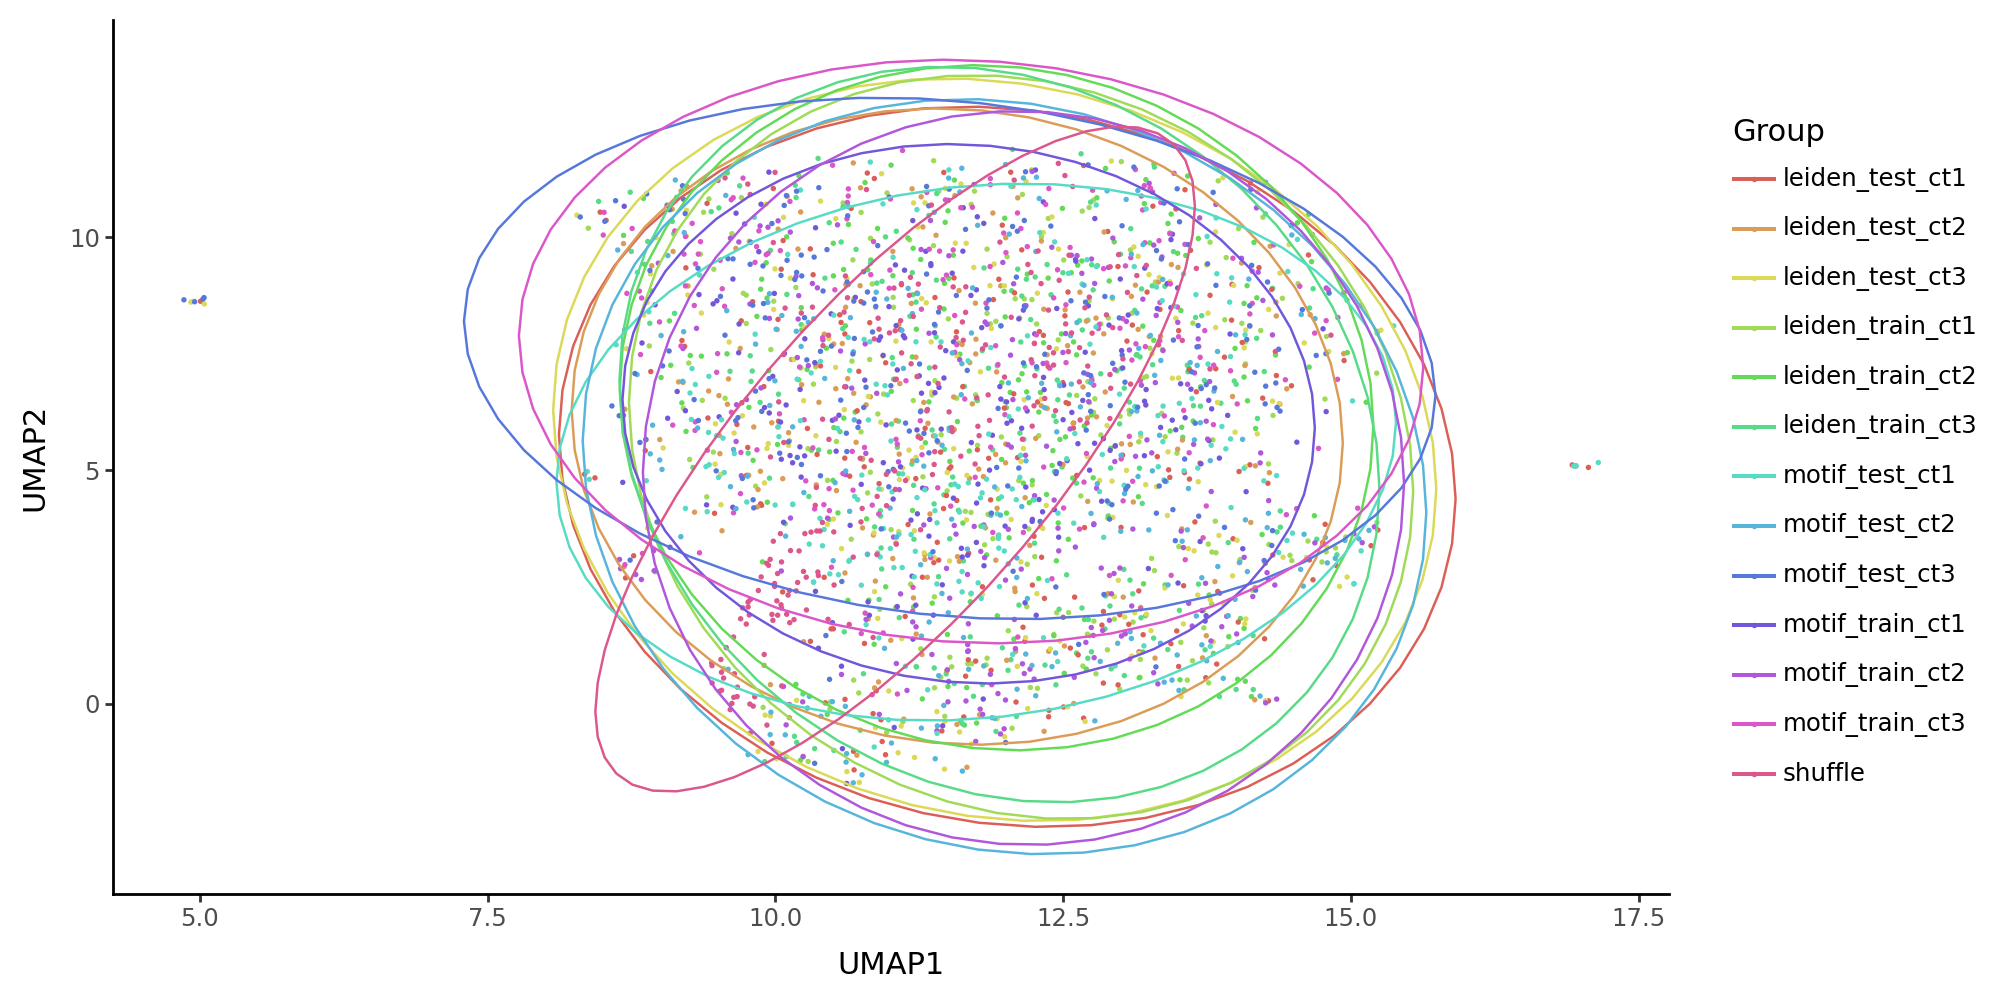

In [99]:
polygraph.visualize.umap_plot(emb, show_ellipse=True) + p9.theme(figure_size=(10,5))

### 1.5.4 Classifier performance

In [101]:
emb.uns['svm_performance']

Accuracy  AUROC
Group                            
leiden_train_ct1      0.98   0.98
leiden_train_ct2      0.90   0.90
leiden_train_ct3      0.94   0.94
leiden_test_ct1       0.99   0.99
leiden_test_ct2       0.97   0.97
leiden_test_ct3       0.97   0.97
motif_train_ct1       0.95   0.95
motif_train_ct2       0.96   0.96
motif_train_ct3       0.83   0.83
motif_test_ct1        0.97   0.97
motif_test_ct2        0.97   0.97
motif_test_ct3        0.88   0.88

# 2. Model based evaluation

## 2.1 Load model trained on catlas scATAC-seq data

In [37]:
!wget https://zenodo.org/records/10214625/files/catlas-enformer-release-model_2.pth

--2024-06-12 18:46:24--  https://zenodo.org/records/10214625/files/catlas-enformer-release-model_2.pth
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 288449775 (275M) [application/octet-stream]
Saving to: ‘catlas-enformer-release-model_2.pth.1’

catlas-enformer-rel 100%[===================>] 275.09M  17.1MB/s    in 19s     

2024-06-12 18:46:43 (14.4 MB/s) - ‘catlas-enformer-release-model_2.pth.1’ saved [288449775/288449775]



In [39]:
import torch
model = torch.load('catlas-enformer-release-model_2.pth')

## 2.2 Model predictions for 203 CATLAS cell types

In [41]:
preds = polygraph.models.predict(seqs, model, batch_size=32, device=0)
preds.shape

(2508, 203)

## 2.3 Model embeddings

### 2.3.1 Embed sequences using lower layers of model

In [ ]:
embeddings = polygraph.models.get_embeddings(
    seqs.Sequence.tolist(), model.to(torch.device(0)), batch_size=512, drop_last_layers=3, swapaxes=True, device=0)
embeddings.shape

(10000, 3072)

### 2.3.2 Compute statistics

In [ ]:
%%time
emb = polygraph.embedding.embedding_analysis(embeddings, seqs, reference_group="leiden_train_ct1", use_pca=True)

Creating AnnData object
PCA
Fraction of total variance explained by PCA components:  0.86935663
UMAP
Differential feature abundance


/opt/conda/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
/opt/conda/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
/opt/conda/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
/opt/conda/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2


1-NN statistics
Within-group KNN diversity
Euclidean distance to nearest reference
Train groupwise classifiers
CPU times: user 2min 25s, sys: 17.5 s, total: 2min 42s
Wall time: 26.7 s


### 2.3.3 Visualize

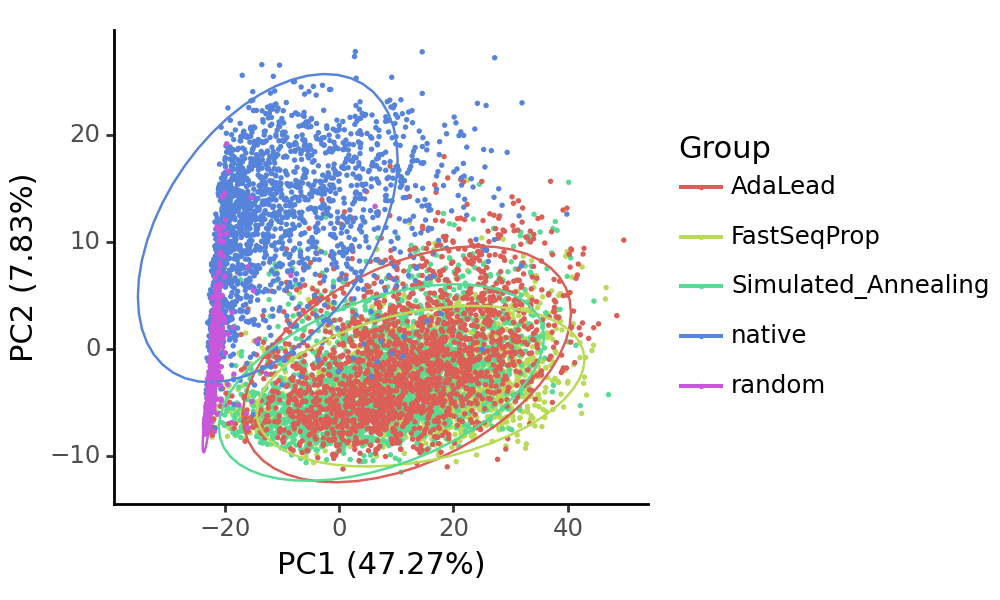

<Figure Size: (500 x 300)>

In [ ]:
polygraph.visualize.pca_plot(emb, show_ellipse=True) + p9.theme(figure_size=(5, 3))

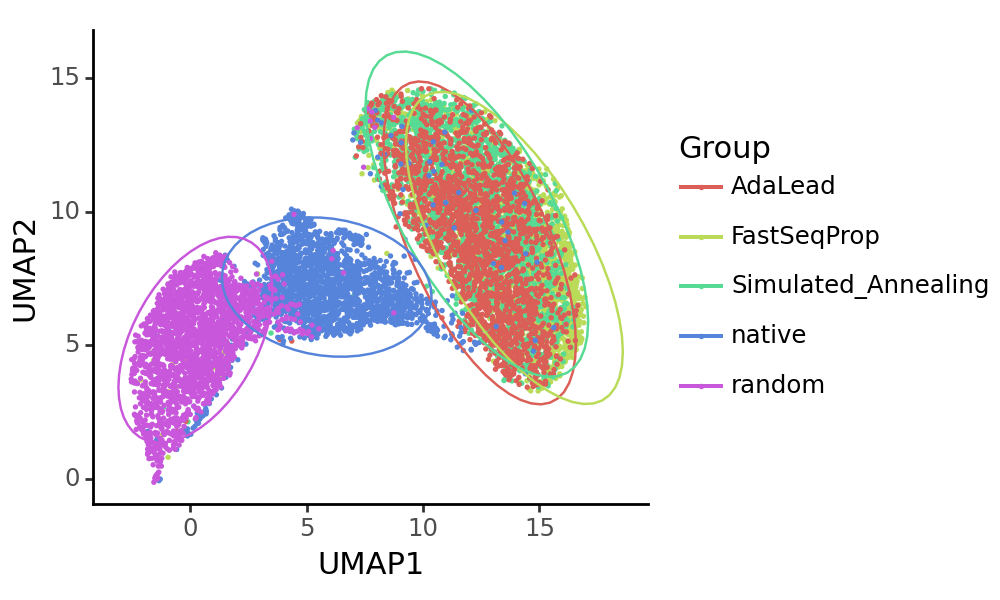

<Figure Size: (500 x 300)>

In [ ]:
polygraph.visualize.umap_plot(emb, show_ellipse=True) + p9.theme(figure_size=(5, 3))

### 2.3.4 1-Nearest Neighbor Fraction

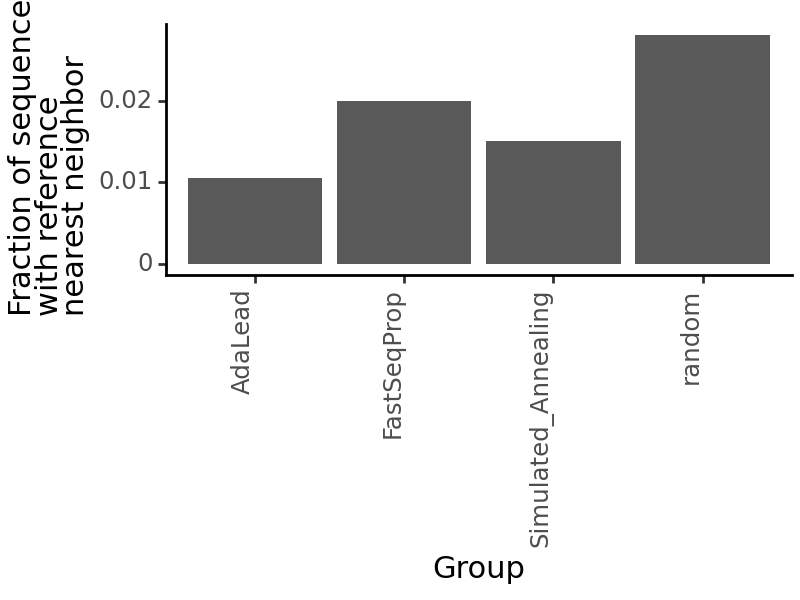

<Figure Size: (400 x 300)>

In [ ]:
polygraph.visualize.one_nn_frac_plot(emb, reference_group="leiden_train_ct1") + p9.theme(figure_size=(4,3))

In [ ]:
print(emb.uns["1NN_ref_prop_test"])

                     group_prop  ref_prop  pval  padj
Group                                                
FastSeqProp                0.02      0.99   0.0   0.0
Simulated_Annealing        0.01      0.99   0.0   0.0
AdaLead                    0.01      0.99   0.0   0.0
random                     0.03      0.97   0.0   0.0


### 2.3.5 Distance to nearest reference sequence

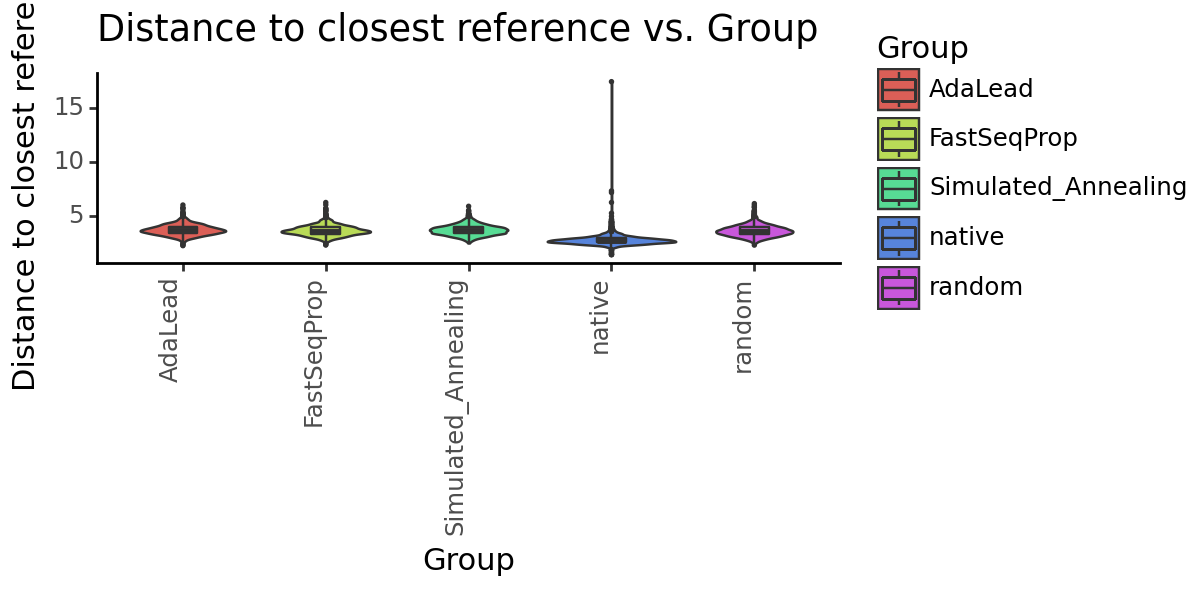

<Figure Size: (600 x 300)>

In [ ]:
polygraph.visualize.boxplot(emb.obs, value_col='Distance to closest reference') + p9.theme(figure_size=(6, 3))

In [ ]:
print(emb.uns['ref_dist_test'])

{'Kruskal': 0.0, 'Dunn':                       AdaLead  FastSeqProp  Simulated_Annealing  native  \
AdaLead              1.00e+00     1.29e-03             5.56e-01     0.0   
FastSeqProp          1.29e-03     1.00e+00             7.92e-03     0.0   
Simulated_Annealing  5.56e-01     7.92e-03             1.00e+00     0.0   
native               0.00e+00     0.00e+00             0.00e+00     1.0   
random               1.48e-07     4.35e-02             2.74e-06     0.0   

                       random  
AdaLead              1.48e-07  
FastSeqProp          4.35e-02  
Simulated_Annealing  2.74e-06  
native               0.00e+00  
random               1.00e+00  }


### 2.3.6 KNN distance (diversity metric)

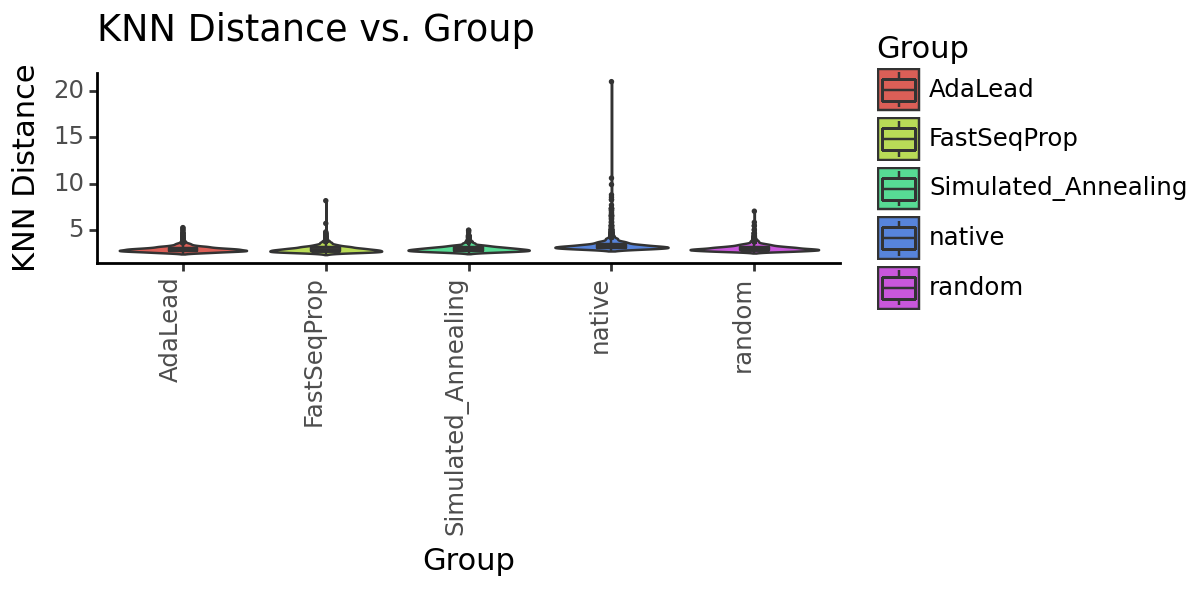

<Figure Size: (600 x 300)>

In [ ]:
polygraph.visualize.boxplot(emb.obs, value_col='KNN Distance') + p9.theme(figure_size=(6, 3))

In [ ]:
print(emb.uns['knn_dist_test'])

{'Kruskal': 0.0, 'Dunn':                        AdaLead  FastSeqProp  Simulated_Annealing     native  \
AdaLead               1.00e+00     2.94e-01             3.95e-05  3.18e-281   
FastSeqProp           2.94e-01     1.00e+00             2.72e-07  1.61e-297   
Simulated_Annealing   3.95e-05     2.72e-07             1.00e+00  1.24e-220   
native               3.18e-281    1.61e-297            1.24e-220   1.00e+00   
random                4.54e-25     5.28e-30             5.63e-10  6.59e-143   

                        random  
AdaLead               4.54e-25  
FastSeqProp           5.28e-30  
Simulated_Annealing   5.63e-10  
native               6.59e-143  
random                1.00e+00  }


### 2.3.7 Classifier performance

In [ ]:
emb.uns['svm_performance']

Accuracy  AUROC
Group                               
FastSeqProp              0.99   0.99
Simulated_Annealing      1.00   1.00
AdaLead                  1.00   1.00
random                   0.99   0.99

# 3. Evaluate Motif content

## 3.1 Download JASPAR motifs and scan sequences

In [ ]:
meme_file = polygraph.input.download_jaspar("vertebrates")
meme_file

--2024-03-01 21:18:50--  https://jaspar.elixir.no/download/data/2024/CORE/JASPAR2024_CORE_vertebrates_non-redundant_pfms_meme.txt
Resolving jaspar.elixir.no (jaspar.elixir.no)... 158.39.201.109
Connecting to jaspar.elixir.no (jaspar.elixir.no)|158.39.201.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 469100 (458K) [text/plain]
Saving to: ‘/opt/conda/lib/python3.8/site-packages/polygraph/resources/jaspar/JASPAR2024_CORE_vertebrates_non-redundant_pfms_meme.txt.1’

     0K .......... .......... .......... .......... .......... 10%  149K 3s
    50K .......... .......... .......... .......... .......... 21%  301K 2s
   100K .......... .......... .......... .......... .......... 32%  180M 1s
   150K .......... .......... .......... .......... .......... 43%  302K 1s
   200K .......... .......... .......... .......... .......... 54%  179M 1s
   250K .......... .......... .......... .......... .......... 65%  318M 0s
   300K .......... .......... .......... .....

'/opt/conda/lib/python3.8/site-packages/polygraph/resources/jaspar/JASPAR2022_CORE_vertebrates_non-redundant_pfms_meme.txt'

In [ ]:
%%time 
sites = polygraph.motifs.scan(seqs, '/opt/conda/lib/python3.8/site-packages/polygraph/resources/jaspar/JASPAR2024_CORE_vertebrates_non-redundant_pfms_meme.txt')

Read 879 motifs from file.
CPU times: user 3min 33s, sys: 392 ms, total: 3min 34s
Wall time: 3min 34s


## 3.2 Filter by TF expression in whole blood according to GTeX

We could use all 879 motifs, but for this example we are going to download GTeX expression data and use it to filter to motifs for TFs expressed in whole blood.

In [ ]:
gtex = polygraph.input.load_gtex_tpm()

File already exists at /opt/conda/lib/python3.8/site-packages/polygraph/resources/gtex/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct.gz


In [ ]:
gtex.head()

Name  Description  Adipose - Subcutaneous  \
0  ENSG00000223972.5      DDX11L1                    0.00   
1  ENSG00000227232.5       WASH7P                    4.06   
2  ENSG00000278267.1    MIR6859-1                    0.00   
3  ENSG00000243485.5  MIR1302-2HG                    0.00   
4  ENSG00000237613.2      FAM138A                    0.00   

   Adipose - Visceral (Omentum)  Adrenal Gland  Artery - Aorta  \
0                          0.00           0.00            0.00   
1                          3.37           2.69            4.05   
2                          0.00           0.00            0.00   
3                          0.00           0.00            0.00   
4                          0.00           0.00            0.00   

   Artery - Coronary  Artery - Tibial  Bladder  Brain - Amygdala  ...  \
0                0.0             0.00     0.00              0.00  ...   
1                3.9             3.64     5.16              1.44  ...   
2                0.0             0.00     0.00              0.00  ...   
3                0.0             0.00     0.00              0.00  ...   
4                0.0             0.00     0.00              0.00  ...   

   Skin - Not Sun Exposed (Suprapubic)  Skin - Sun Exposed (Lower leg)  \
0                                 0.00                            0.00   
1                                 5.93                            6.13   
2                                 0.00                            0.00   
3                                 0.00                            0.00   
4                                 0.00                            0.00   

   Small Intestine - Terminal Ileum  Spleen  Stomach  Testis  Thyroid  Uterus  \
0                              0.00    0.00     0.00    0.17     0.00    0.00   
1                              4.19    5.93     3.06    4.70     6.27    7.19   
2                              0.00    0.00     0.00    0.00     0.00    0.00   
3                              0.00    0.00     0.00    0.05     0.00    0.00   
4                              0.00    0.00     0.00    0.00     0.00    0.00   

   Vagina  Whole Blood  
0    0.00         0.00  
1    5.75         2.65  
2    0.00         0.00  
3    0.00         0.00  
4    0.00         0.00  

[5 rows x 56 columns]

In [ ]:
blood_tfs = gtex.loc[gtex['Whole Blood'] > 1, 'Description']
all_tfs = sites.MotifID.str.upper()
selected_tfs = set(all_tfs).intersection(blood_tfs)
len(selected_tfs)

311

In [ ]:
sites = sites[sites.MotifID.isin(selected_tfs)]

## 3.1 Motif count embedding

### 3.1.1 Count motifs

In [ ]:
counts = polygraph.motifs.motif_frequencies(sites, seqs=seqs, normalize=True)
counts.iloc[:5, :5]

ATF2      ATF3  ATF4      ATF6  ATF7
SeqID                                          
seq_0  0.00e+00  0.00e+00   0.0  0.00e+00   0.0
seq_1  5.00e-03  0.00e+00   0.0  0.00e+00   0.0
seq_2  0.00e+00  0.00e+00   0.0  5.00e-03   0.0
seq_3  0.00e+00  0.00e+00   0.0  0.00e+00   0.0
seq_4  0.00e+00  5.00e-03   0.0  0.00e+00   0.0

### 3.1.2 Compute statistics

In [ ]:
%%time
emb = polygraph.embedding.embedding_analysis(counts, seqs, reference_group="leiden_train_ct1", use_pca=True)

Creating AnnData object
PCA
Fraction of total variance explained by PCA components:  0.6873481267967111
UMAP
Differential feature abundance
1-NN statistics
Within-group KNN diversity
Euclidean distance to nearest reference
Train groupwise classifiers
CPU times: user 1min 54s, sys: 37.9 s, total: 2min 32s
Wall time: 19.9 s


### 3.1.3 Visualize

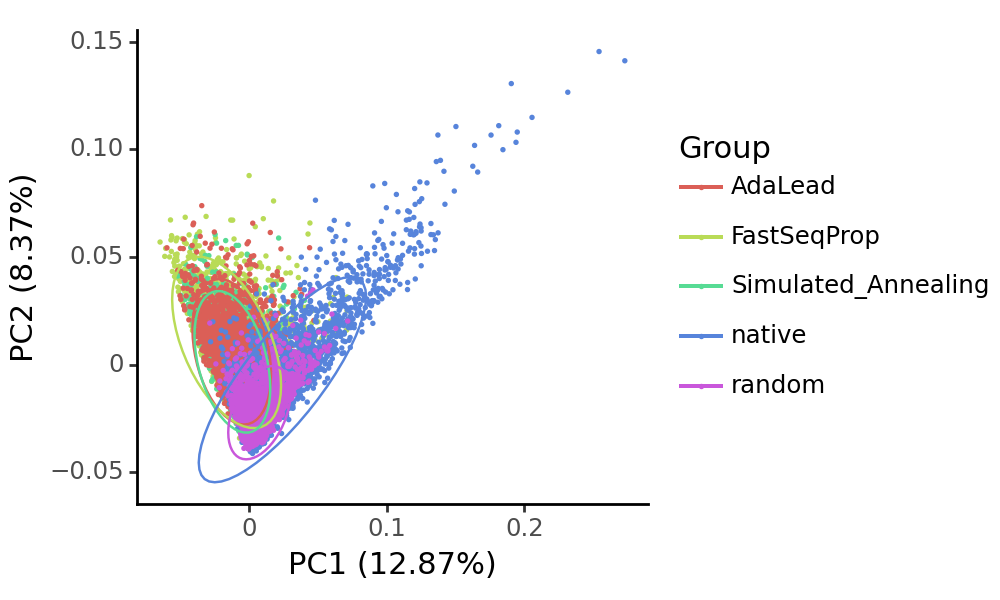

<Figure Size: (500 x 300)>

In [ ]:
polygraph.visualize.pca_plot(emb, show_ellipse=True) + p9.theme(figure_size=(5, 3))

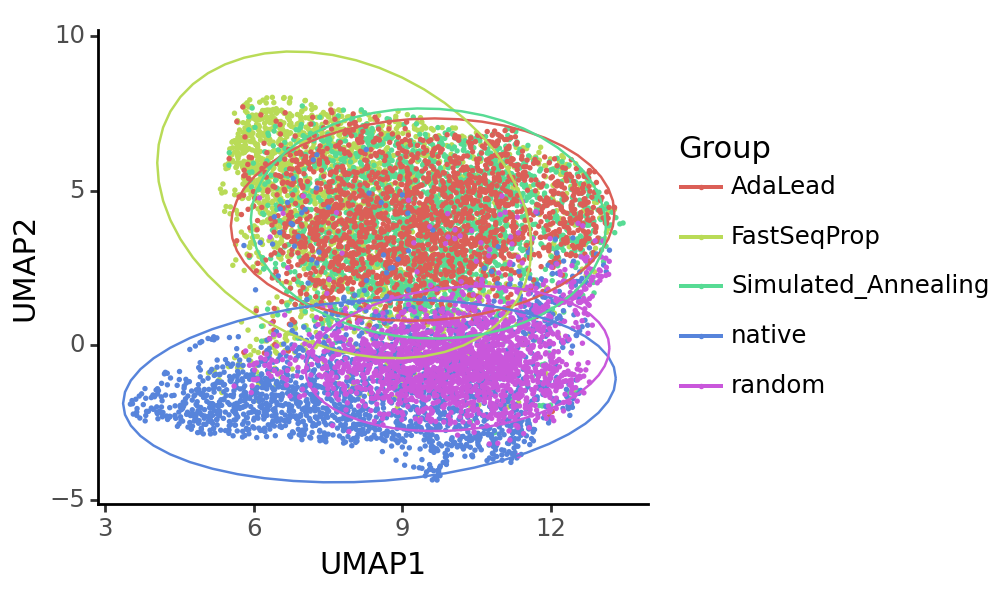

<Figure Size: (500 x 300)>

In [ ]:
polygraph.visualize.umap_plot(emb, show_ellipse=True) + p9.theme(figure_size=(5, 3))

### 3.1.4 Motif occurrence

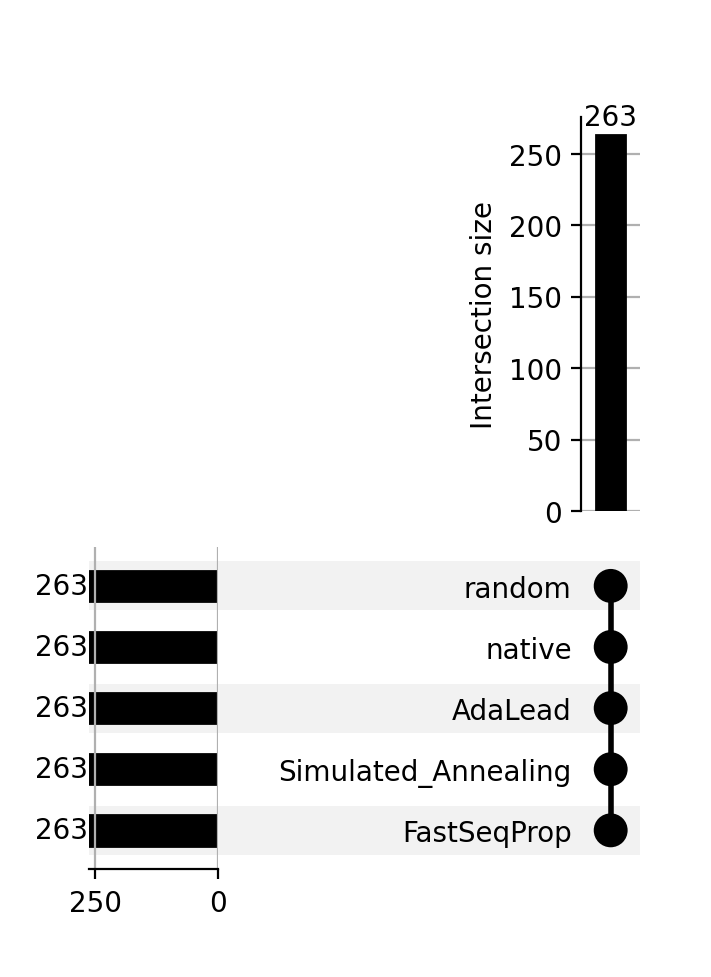

In [ ]:
polygraph.visualize.upset_plot(emb)

### 3.1.5 Differential motif abundance

In [ ]:
print("Number of differential motifs compared to reference")
print(emb.uns["DE_test"][emb.uns["DE_test"].padj < .05].Group.value_counts())

print("")

print("Top Differential motifs")
print(emb.uns["DE_test"][emb.uns["DE_test"].padj < .05].sort_values('padj').head())

Number of differential motifs compared to reference
Group
AdaLead                226
Simulated_Annealing    226
FastSeqProp            213
random                 201
Name: count, dtype: int64

Top Differential motifs
                   Group  value  score  padj  log2FC
0                AdaLead  TRPS1  43.97   0.0    1.54
1                AdaLead  TBX21  39.53   0.0    2.12
2                AdaLead  GATA1  37.73   0.0    1.66
263          FastSeqProp  TRPS1  42.22   0.0    1.59
526  Simulated_Annealing  TRPS1  39.68   0.0    1.33


### 3.1.6 1-Nearest Neighbor Fraction

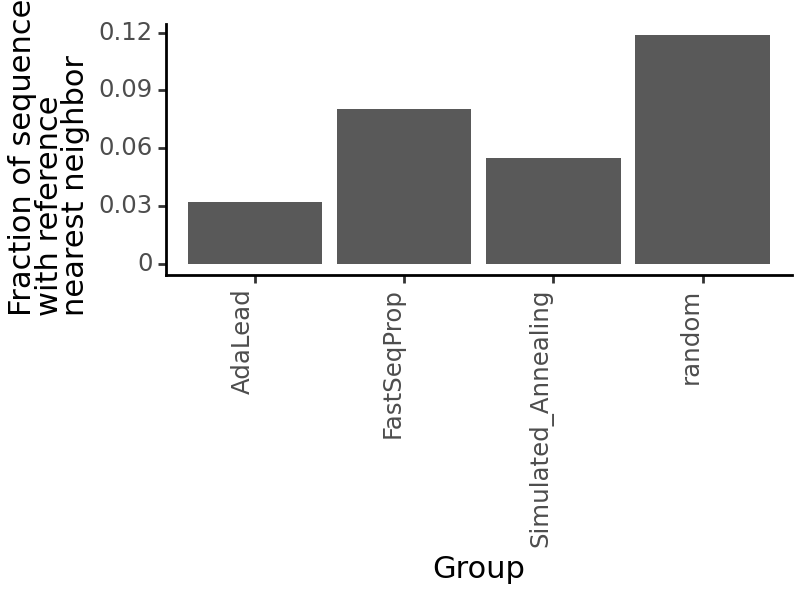

<Figure Size: (400 x 300)>

In [ ]:
polygraph.visualize.one_nn_frac_plot(emb, reference_group="leiden_train_ct1") + p9.theme(figure_size=(4,3))

In [ ]:
print("p-values for proportion of sequences with native nearest neighbor")
print(emb.uns["1NN_ref_prop_test"])

p-values for proportion of sequences with native nearest neighbor
                     group_prop  ref_prop  pval  padj
Group                                                
FastSeqProp                0.08      0.93   0.0   0.0
Simulated_Annealing        0.06      0.94   0.0   0.0
AdaLead                    0.03      0.96   0.0   0.0
random                     0.12      0.75   0.0   0.0


### 3.1.7 Distance to closest reference sequence

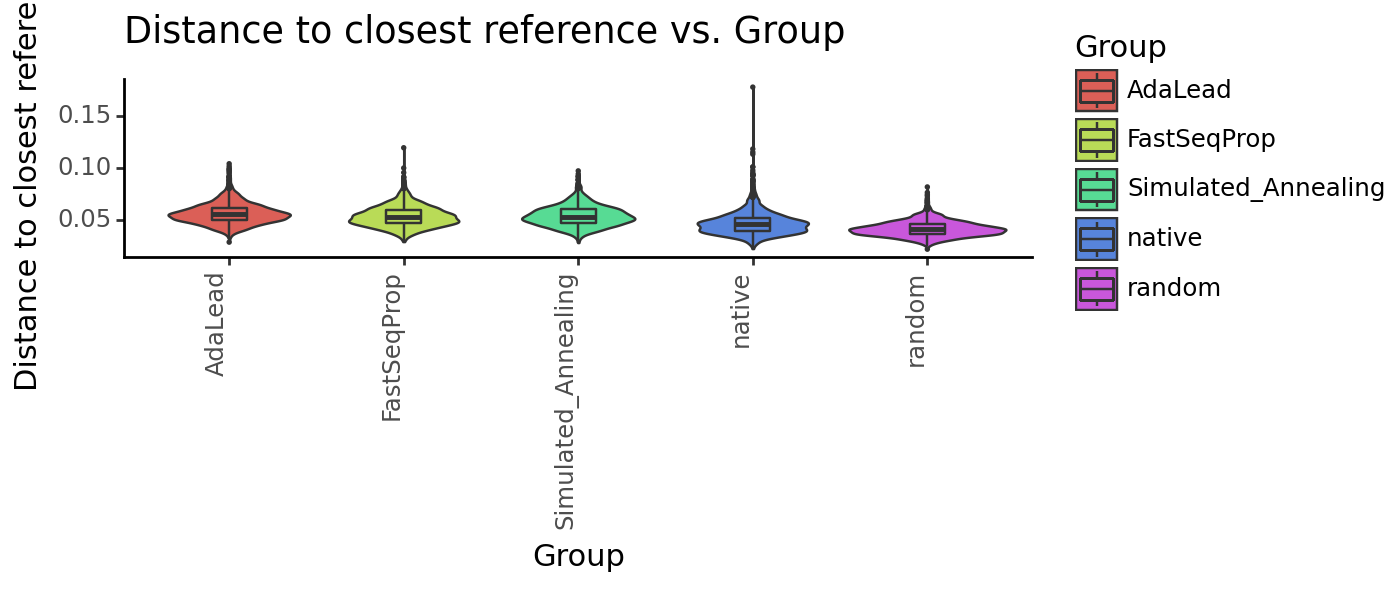

<Figure Size: (700 x 300)>

In [ ]:
polygraph.visualize.boxplot(emb.obs, value_col='Distance to closest reference') + p9.theme(figure_size=(7, 3))

In [ ]:
print("p-values for distance to closest reference")
print(emb.uns["ref_dist_test"])

p-values for distance to closest reference
{'Kruskal': 0.0, 'Dunn':                        AdaLead  FastSeqProp  Simulated_Annealing     native  \
AdaLead               1.00e+00     1.01e-14             1.02e-10  6.58e-183   
FastSeqProp           1.01e-14     1.00e+00             1.98e-01   1.17e-98   
Simulated_Annealing   1.02e-10     1.98e-01             1.00e+00  9.39e-111   
native               6.58e-183     1.17e-98            9.39e-111   1.00e+00   
random                0.00e+00    7.67e-299             0.00e+00   1.35e-56   

                        random  
AdaLead               0.00e+00  
FastSeqProp          7.67e-299  
Simulated_Annealing   0.00e+00  
native                1.35e-56  
random                1.00e+00  }


### 3.1.8 K-Nearest Neighbor distance (diversity metric)

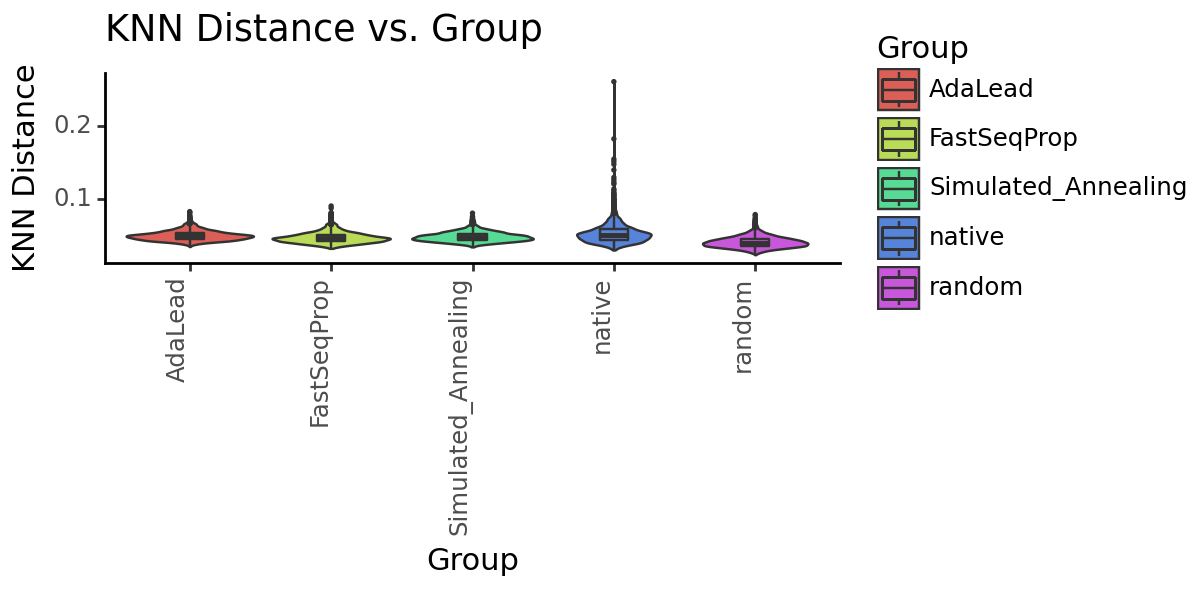

<Figure Size: (600 x 300)>

In [ ]:
polygraph.visualize.boxplot(emb.obs, value_col='KNN Distance') + p9.theme(figure_size=(6, 3))

In [ ]:
print("p-values for KNN diversity")
print(emb.uns["knn_dist_test"])

p-values for KNN diversity
{'Kruskal': 0.0, 'Dunn':                        AdaLead  FastSeqProp  Simulated_Annealing    native  \
AdaLead               1.00e+00     6.59e-36             1.99e-10  2.21e-02   
FastSeqProp           6.59e-36     1.00e+00             8.37e-10  1.65e-49   
Simulated_Annealing   1.99e-10     8.37e-10             1.00e+00  5.45e-18   
native                2.21e-02     1.65e-49             5.45e-18  1.00e+00   
random               2.29e-276    8.02e-117            1.52e-186  0.00e+00   

                        random  
AdaLead              2.29e-276  
FastSeqProp          8.02e-117  
Simulated_Annealing  1.52e-186  
native                0.00e+00  
random                1.00e+00  }


### 3.1.9 Classifier performance

In [ ]:
emb.uns['svm_performance']

Accuracy  AUROC
Group                               
FastSeqProp              0.96   0.96
Simulated_Annealing      0.98   0.98
AdaLead                  0.99   0.99
random                   0.93   0.93

## 3.2 Motif positions

In [ ]:
print(polygraph.stats.kruskal_dunn(sites[sites.MotifID=='GATA1'], val_col='start'))

{'Kruskal': 9.235286326359694e-22, 'Dunn':                       AdaLead  FastSeqProp  Simulated_Annealing    native  \
AdaLead              1.00e+00     5.15e-01             4.77e-04  1.00e-12   
FastSeqProp          5.15e-01     1.00e+00             2.93e-03  4.91e-12   
Simulated_Annealing  4.77e-04     2.93e-03             1.00e+00  3.60e-06   
native               1.00e-12     4.91e-12             3.60e-06  1.00e+00   
random               4.00e-12     1.62e-11             6.22e-07  2.11e-01   

                       random  
AdaLead              4.00e-12  
FastSeqProp          1.62e-11  
Simulated_Annealing  6.22e-07  
native               2.11e-01  
random               1.00e+00  }


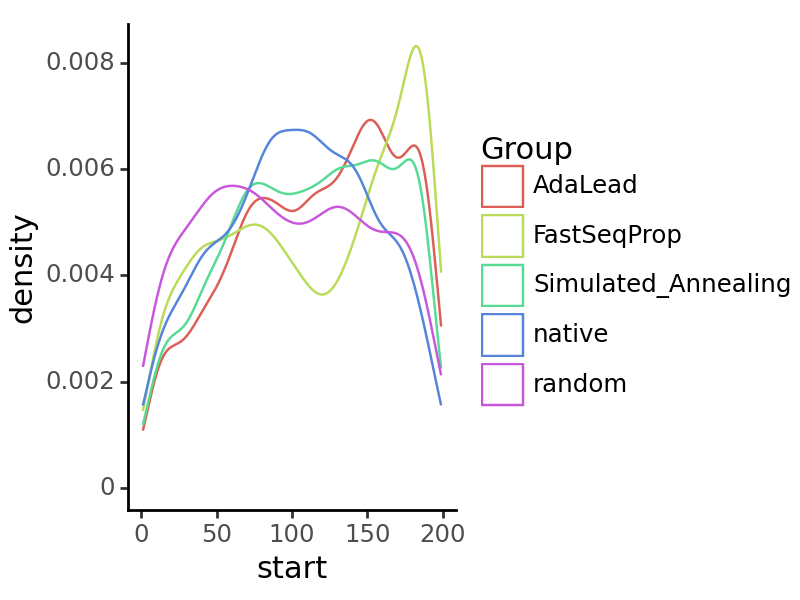

<Figure Size: (400 x 300)>

In [ ]:
polygraph.visualize.densityplot(sites[sites.MotifID=='GATA1'], value_col='start') + p9.theme(figure_size=(4,3))

## 3.3 Motif pair syntax

We will identify co-occurring pairs of motifs. This can take a long time, so for speed we use only the first 50 motifs.

### 3.3.1 Find motif pairs

In [ ]:
sel_motifs = sites.MotifID.unique()[:50]
sel_sites = sites[sites.MotifID.isin(sel_motifs)].copy()

In [ ]:
%%time
motif_pairs = polygraph.motifs.get_motif_pairs(sel_sites)
motif_pairs.head()

### 3.3.2 Differential abundance of motif pairs

In [ ]:
pair_diff_abundance = polygraph.motifs.motif_pair_differential_abundance(
    motif_pairs, seqs, reference_group="leiden_train_ct1", max_prop_cutoff=0.25)

pair_diff_abundance.head()

Selected 239 pairs based on in-group proportion


Group  group_prop  ref_prop  log2FC       pval       padj  \
0          FastSeqProp        0.14      0.35   -1.34   2.37e-56   5.45e-56   
1  Simulated_Annealing        0.09      0.35   -1.97   4.55e-93   2.09e-92   
2              AdaLead        0.08      0.35   -2.22  3.11e-107  1.89e-106   
3               random        0.24      0.35   -0.52   1.65e-13   2.05e-13   
4          FastSeqProp        0.09      0.38   -2.08  1.44e-109  9.29e-109   

          MotifID  
0  (ELF4, ZBTB11)  
1  (ELF4, ZBTB11)  
2  (ELF4, ZBTB11)  
3  (ELF4, ZBTB11)  
4   (ELF4, GABPA)

In [ ]:
print("Number of differential motif pairs compared to reference")
print(pair_diff_abundance[pair_diff_abundance.padj < .01].Group.value_counts())

print("")

print("Top Differential motif pairs")
print(pair_diff_abundance[pair_diff_abundance.padj < .01].sort_values('padj').head())

Number of differential motif pairs compared to reference
Group
random                 229
Simulated_Annealing    228
AdaLead                225
FastSeqProp            222
Name: count, dtype: int64

Top Differential motif pairs
           Group  group_prop  ref_prop  log2FC       pval       padj  \
152  FastSeqProp        0.73      0.13    2.51   0.00e+00   0.00e+00   
154      AdaLead        0.68      0.13    2.42  1.44e-298  6.86e-296   
150      AdaLead        0.06      0.49   -3.15  2.10e-234  6.69e-232   
790      AdaLead        0.04      0.44   -3.58  7.03e-226  1.68e-223   
914      AdaLead        0.04      0.45   -3.37  5.39e-218  1.03e-215   

            MotifID  
152  (GATA1, GATA1)  
154  (GATA1, GATA1)  
150  (GABPA, IKZF1)  
790   (ELK4, IKZF1)  
914   (ELF1, IKZF1)  


### 3.3.3 Differentially oriented motif pairs

In [ ]:
pair_diff_orientation = polygraph.motifs.motif_pair_differential_orientation(
    motif_pairs, seqs, reference_group="leiden_train_ct1", ref_prop_cutoff=0.2)

pair_diff_orientation.head()

Selected 328 pairs based on in-group proportion


Group  group_prop  ref_prop    log2FC  pval  padj  \
0          FastSeqProp        0.53      0.53  1.41e-02  0.89  0.97   
1  Simulated_Annealing        0.48      0.53 -1.37e-01  0.24  0.45   
2              AdaLead        0.50      0.53 -8.43e-02  0.46  0.67   
3               random        0.53      0.53 -5.42e-03  0.96  1.00   
4          FastSeqProp        0.48      0.43  1.53e-01  0.14  0.30   

          MotifID  
0    (ELF4, RXRB)  
1    (ELF4, RXRB)  
2    (ELF4, RXRB)  
3    (ELF4, RXRB)  
4  (ELF4, ZNF75A)

In [ ]:
print("Number of differentially oriented motif pairs compared to reference")
print(pair_diff_orientation[pair_diff_orientation.padj <= .01].Group.value_counts())

print("")

print("Top Differentially oriented motif pairs")
print(pair_diff_orientation[pair_diff_orientation.padj <= .01].sort_values('padj').head())

Number of differentially oriented motif pairs compared to reference
Group
random                 69
Simulated_Annealing    48
FastSeqProp            48
AdaLead                38
Name: count, dtype: int64

Top Differentially oriented motif pairs
                   Group  group_prop  ref_prop  log2FC      pval      padj  \
840          FastSeqProp        0.57      0.74   -0.37  4.67e-17  6.12e-14   
268          FastSeqProp        0.50      0.66   -0.41  3.77e-15  2.47e-12   
841  Simulated_Annealing        0.56      0.74   -0.40  1.35e-14  5.90e-12   
288          FastSeqProp        0.48      0.35    0.45  9.33e-14  3.06e-11   
264          FastSeqProp        0.42      0.29    0.53  1.67e-13  4.39e-11   

              MotifID  
840    (KLF10, KLF10)  
268  (ZNF707, ZNF75A)  
841    (KLF10, KLF10)  
288   (KLF10, ZNF75A)  
264   (ZNF707, KLF10)  


### 3.3.4 Differentially spaced motif pairs

In [ ]:
pair_diff_dist = polygraph.motifs.motif_pair_differential_distance(
    motif_pairs, seqs, reference_group="leiden_train_ct1", ref_prop_cutoff=0.2)

pair_diff_dist.head()

Selected 328 pairs based on in-group proportion


index                Group  group_mean  ref_mean  log2FC  pval  padj  \
0      0          FastSeqProp       60.05     60.71   -0.02  0.54  0.73   
1      0  Simulated_Annealing       62.79     60.71    0.05  0.45  0.66   
2      0              AdaLead       61.49     60.71    0.02  0.98  0.99   
3      0               random       59.37     60.71   -0.03  0.34  0.55   
4      0          FastSeqProp       64.58     59.64    0.11  0.07  0.18   

          MotifID  
0    (ELF4, RXRB)  
1    (ELF4, RXRB)  
2    (ELF4, RXRB)  
3    (ELF4, RXRB)  
4  (ELF4, ZNF75A)

In [ ]:
sig_diff_dist = pair_diff_dist[(pair_diff_dist.padj <= .01) & (pair_diff_dist.ref_mean > 5)]

print("Number of differentially spaced motif pairs compared to reference")
print(sig_diff_dist.Group.value_counts())

print("")

print("Top Differentially spaced motif pairs")
print(sig_diff_dist.sort_values('padj').head())

Number of differentially spaced motif pairs compared to reference
Group
AdaLead                72
FastSeqProp            59
Simulated_Annealing    58
random                 41
Name: count, dtype: int64

Top Differentially spaced motif pairs
     index                Group  group_mean  ref_mean  log2FC      pval  \
640      0          FastSeqProp       16.24     35.63   -1.13  1.08e-34   
641      0  Simulated_Annealing       18.50     35.63   -0.95  9.03e-34   
182      0              AdaLead       27.09     36.07   -0.41  5.37e-33   
642      0              AdaLead       19.30     35.63   -0.88  1.06e-28   
643      0               random       24.85     35.63   -0.52  1.16e-21   

         padj        MotifID  
640  1.41e-31  (ELF1, GABPA)  
641  5.92e-31  (ELF1, GABPA)  
182  2.35e-30   (MAFK, JUND)  
642  3.47e-26  (ELF1, GABPA)  
643  3.04e-19  (ELF1, GABPA)  


## 3.4 NMF

In [ ]:
%%time
W, H, test_results = polygraph.motifs.nmf(counts, seqs, reference_group="leiden_train_ct1", n_components=10)

/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.


CPU times: user 1min 28s, sys: 4.21 s, total: 1min 32s
Wall time: 1.19 s


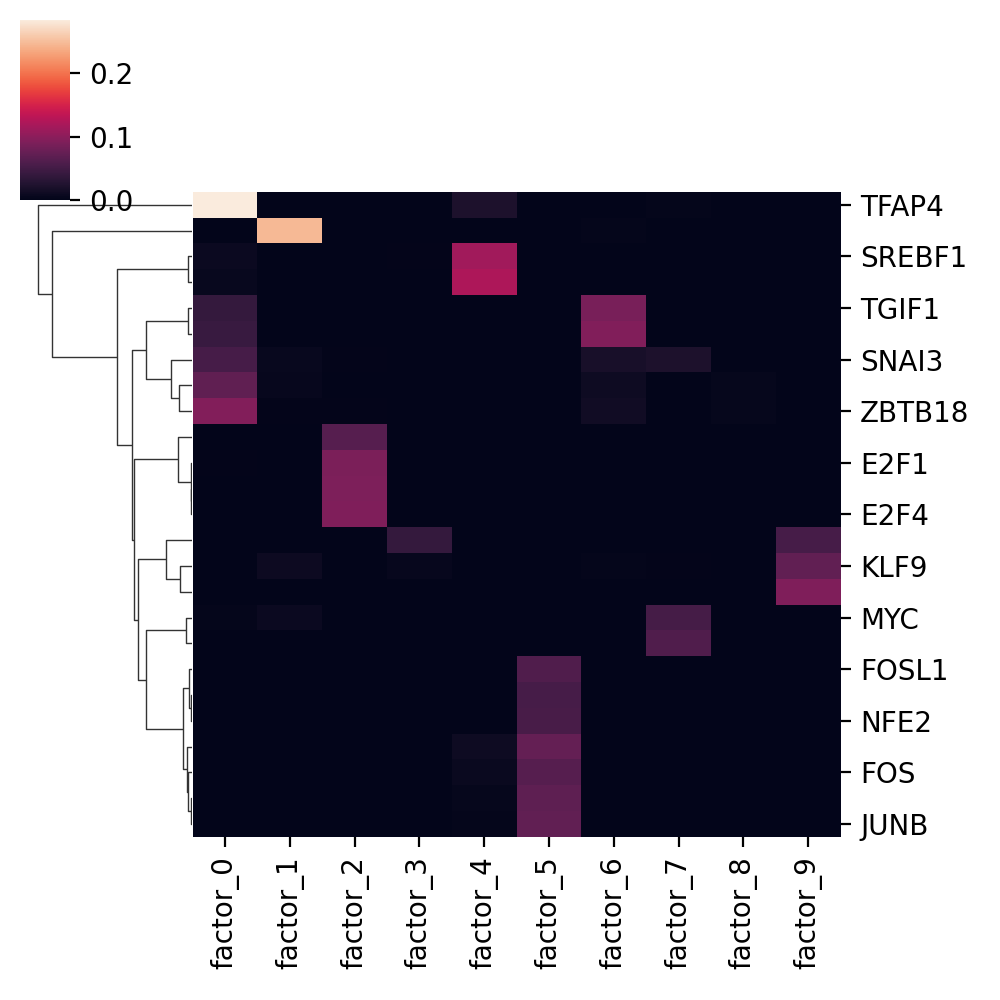

In [ ]:
# Motifs that contribute to each factor
polygraph.visualize.plot_factors_nmf(H, n_features=25, figsize=(5,5))

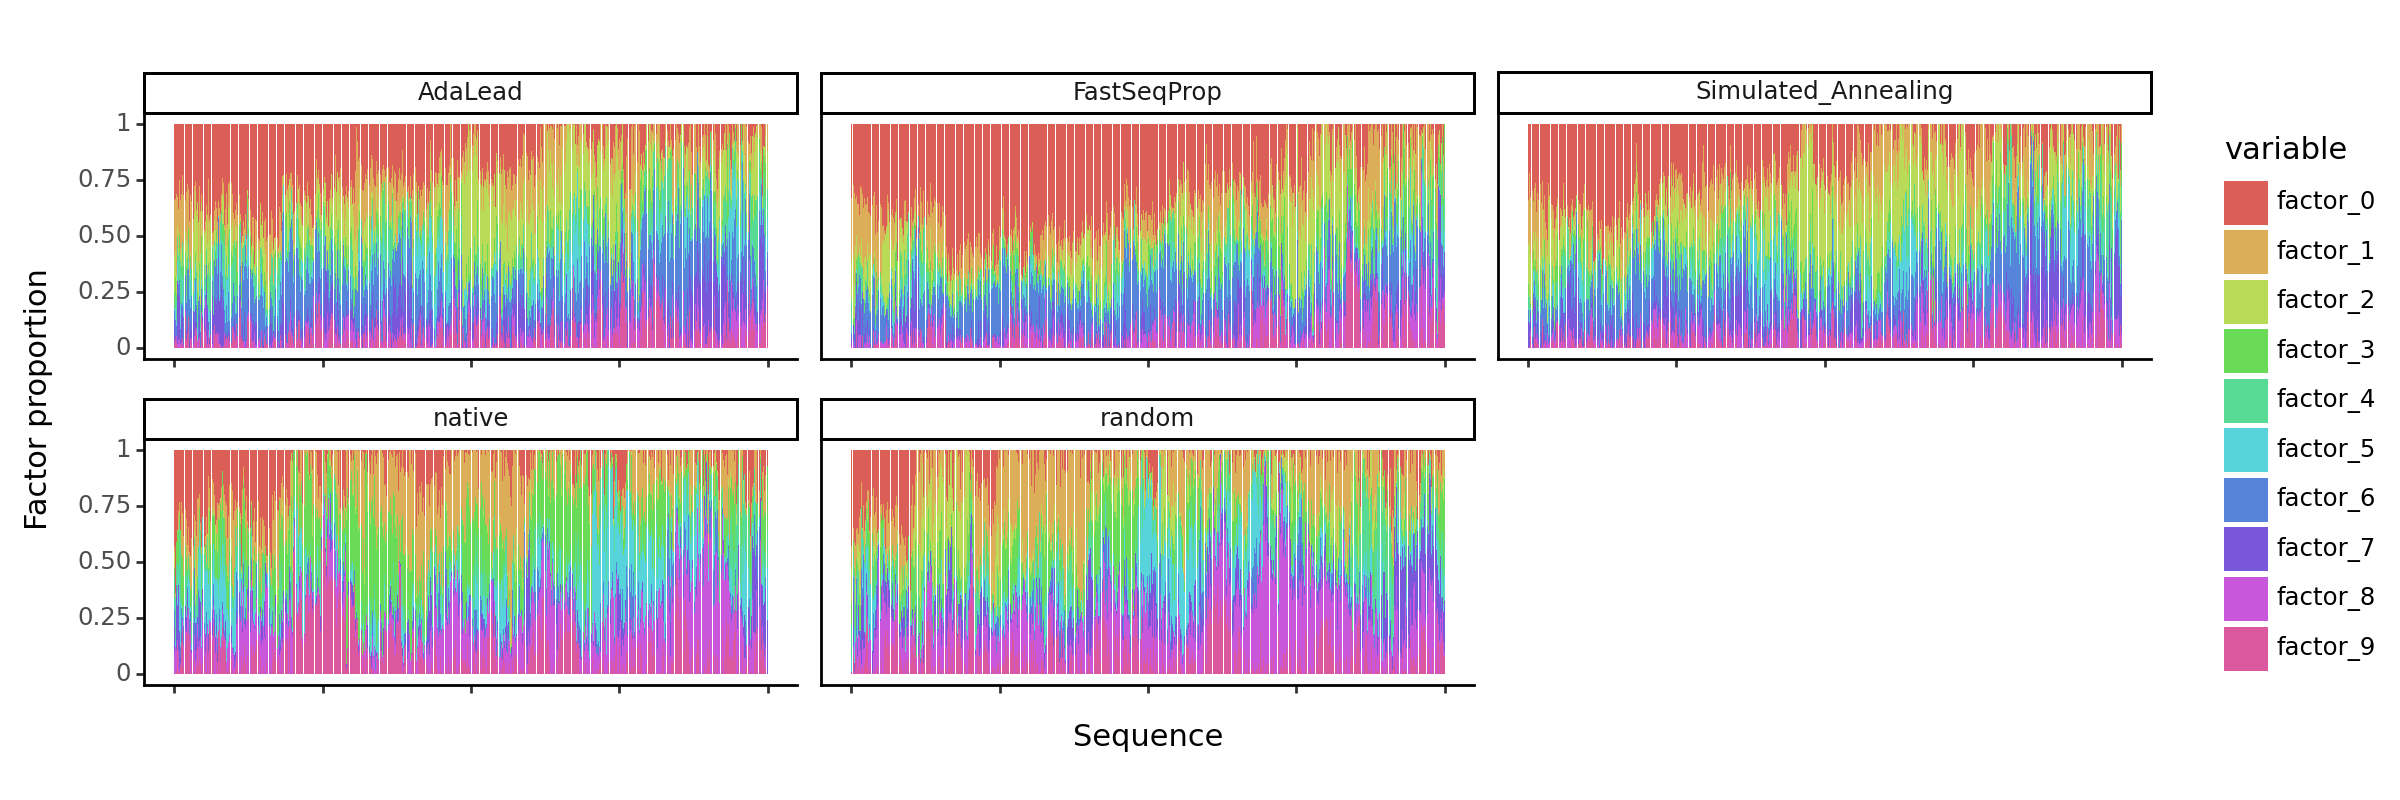

<Figure Size: (1200 x 400)>

In [ ]:
polygraph.visualize.plot_seqs_nmf(W) + p9.theme(figure_size=(12, 4))

In [ ]:
test_results.head()

Group  group_mean  ref_mean  log2FC       pval       padj  \
0          FastSeqProp        0.11      0.03    1.99  3.83e-288  1.91e-287   
0  Simulated_Annealing        0.06      0.03    1.13   1.27e-92   2.55e-92   
0              AdaLead        0.06      0.03    1.23  1.02e-115  2.56e-115   
0               random        0.01      0.03   -1.04   5.92e-53   1.13e-52   
0          FastSeqProp        0.04      0.05   -0.37   2.52e-06   2.66e-06   

     factor  
0  factor_0  
0  factor_0  
0  factor_0  
0  factor_0  
0  factor_1

In [ ]:
# How many factors contribute differently in each synthetic group vs. the reference?
test_results[test_results.padj < .01].Group.value_counts()

Group
FastSeqProp            10
Simulated_Annealing    10
AdaLead                10
random                 10
Name: count, dtype: int64

# 4. Language model likelihood calculation

In [ ]:
# Substitute '/hyena-dna' with the path to your cloned hyena-dna repository
# See https://github.com/HazyResearch/hyena-dna for instructions to clone and install hyenadna
model = polygraph.likelihood.load_hyenadna(hyena_path='/hyena-dna')

Loading config
Building model
Loading weights


In [ ]:
log_likelihood = polygraph.likelihood.compute_likelihood(
    seqs, model, num_workers=8, device=0)
seqs['log_likelihood'] = log_likelihood

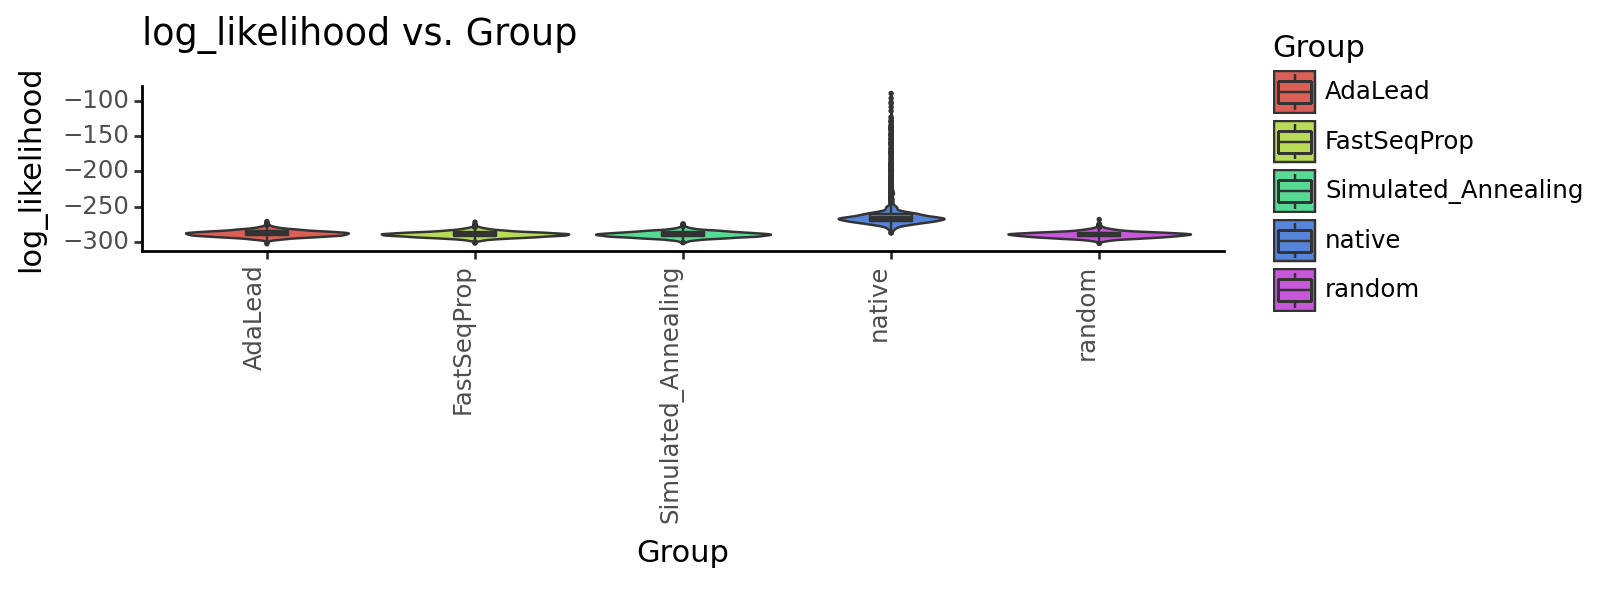

<Figure Size: (800 x 300)>

In [ ]:
polygraph.visualize.boxplot(seqs, group_col="Group", value_col="log_likelihood") + p9.theme(figure_size=(8, 3))